In [ ]:
!pip install lasio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lasio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 1.7 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
campos1 = pd.read_csv('/content/drive/MyDrive/codigos/campos/dado_campos1.csv', sep='\s+') # poco usado
campos2 = pd.read_csv('/content/drive/MyDrive/codigos/campos/dado_campos2.csv', sep='\s+')
campos3 = pd.read_csv('/content/drive/MyDrive/codigos/campos/dado_campos3.csv', sep='\s+') # poco blind
campos4 = pd.read_csv('/content/drive/MyDrive/codigos/campos/dado_campos4.csv', sep='\s+')
campos5 = pd.read_csv('/content/drive/MyDrive/codigos/campos/dado_campos5.csv', sep='\s+') # poco usado
campos6 = pd.read_csv('/content/drive/MyDrive/codigos/campos/dado_campos6.csv', sep='\s+')
campos7 = pd.read_csv('/content/drive/MyDrive/codigos/campos/dado_campos7.csv', sep='\s+')
campos8 = pd.read_csv('/content/drive/MyDrive/codigos/campos/dado_campos8.csv', sep='\s+')
campos9 = pd.read_csv('/content/drive/MyDrive/codigos/campos/dado_campos9.csv', sep='\s+')
campos10 = pd.read_csv('/content/drive/MyDrive/codigos/campos/dado_campos10.csv', sep='\s+')
campos11 = pd.read_csv('/content/drive/MyDrive/codigos/campos/dado_campos11.csv', sep='\s+')
campos12 = pd.read_csv('/content/drive/MyDrive/codigos/campos/dado_campos12.csv', sep='\s+') # poco usado

In [ ]:
campos3.head()

DEPTH       DT       GR     ILD     NPHI    RHOB
0  2950.2  89.1641  78.4492  1.7232  24.7969  2.4984
1  2950.4  90.4185  80.2617  1.7415  25.8906  2.4950
2  2950.6  89.5469  82.2031  1.8008  26.2795  2.4832
3  2950.8  88.5078  82.6934  1.8838  25.8828  2.4728
4  2951.0  88.7383  82.7773  1.9624  25.5601  2.4691

In [ ]:
# funcao que tira o indice de todos os elementos
def resete(*argument):
  lista = []
  for i in argument:
    i = i.reset_index()
    lista.append(i)
  return lista

In [ ]:
dados_campos = resete(campos1,campos2,campos3,campos4,campos5,campos6,campos7,campos8,campos9,campos10,campos11,campos12)

In [ ]:
df_campos1 = dados_campos[0]
df_campos2 = dados_campos[1]
df_campos3 = dados_campos[2]
df_campos4 = dados_campos[3]
df_campos5 = dados_campos[4]
df_campos6 = dados_campos[5]
df_campos7 = dados_campos[6]
df_campos8 = dados_campos[7]
df_campos9 = dados_campos[8]
df_campos10 = dados_campos[9]
df_campos11 = dados_campos[10]
df_campos12 = dados_campos[11]

In [ ]:
df_campos1['DEPTH'] = df_campos1['DEPTH']*0.3048
df_campos2['DEPTH'] = df_campos2['DEPTH']*0.3048
df_campos3['DEPTH'] = df_campos3['DEPTH']*0.3048
df_campos4['DEPTH'] = df_campos4['DEPTH']*0.3048
df_campos5['DEPTH'] = df_campos5['DEPTH']*0.3048
df_campos6['DEPTH'] = df_campos6['DEPTH']*0.3048
df_campos7['DEPTH'] = df_campos7['DEPTH']*0.3048
df_campos8['DEPTH'] = df_campos8['DEPTH']*0.3048
df_campos9['DEPTH'] = df_campos9['DEPTH']*0.3048
df_campos10['DEPTH'] = df_campos10['DEPTH']*0.3048
df_campos11['DEPTH'] = df_campos11['DEPTH']*0.3048
df_campos12['DEPTH'] = df_campos12['DEPTH']*0.3048

In [ ]:
df_campos1['IGR']= (df_campos1['GR'] - min(df_campos1['GR']))/(max(df_campos1['GR']) - min(df_campos1['GR']))
df_campos1['VSH'] = 0.33*(2 ** (2* df_campos1['IGR']) -1)
df_campos1 = df_campos1[['DEPTH','DT','RHOB','GR','NPHI','VSH']]
df_campos1['NPHI'] = df_campos1['NPHI']/100
df_campos1 = df_campos1.dropna()
print(df_campos1)


          DEPTH       DT    RHOB       GR      NPHI       VSH
0     899.89152  95.4766  2.4929  74.3750  0.257249  0.541427
1     899.95248  94.8945  2.4480  78.6992  0.257249  0.609680
2     900.01344  92.9727  2.4355  80.0625  0.257617  0.632288
3     900.07440  91.8281  2.4119  81.0391  0.260015  0.648817
4     900.13536  91.0703  2.4176  81.8203  0.253672  0.662242
...         ...      ...     ...      ...       ...       ...
1233  975.05520  70.8867  2.5950  33.0625  0.191484  0.093987
1234  975.11616  70.3320  2.5938  29.3125  0.199883  0.067148
1235  975.17712  68.2070  2.5776  26.3320  0.198242  0.047033
1236  975.23808  67.3203  2.5709  27.5039  0.173438  0.054818
1237  975.29904  68.0703  2.5752  29.3555  0.144141  0.067446

[1238 rows x 6 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df_campos1.corr()

DEPTH        DT      RHOB        GR      NPHI       VSH
DEPTH  1.000000 -0.651483  0.493315 -0.660303 -0.667781 -0.626540
DT    -0.651483  1.000000 -0.821432  0.540457  0.880617  0.474103
RHOB   0.493315 -0.821432  1.000000 -0.321068 -0.708967 -0.220210
GR    -0.660303  0.540457 -0.321068  1.000000  0.589253  0.983429
NPHI  -0.667781  0.880617 -0.708967  0.589253  1.000000  0.536423
VSH   -0.626540  0.474103 -0.220210  0.983429  0.536423  1.000000

Text(0.5, 0.98, 'Exemplo das features e do target')

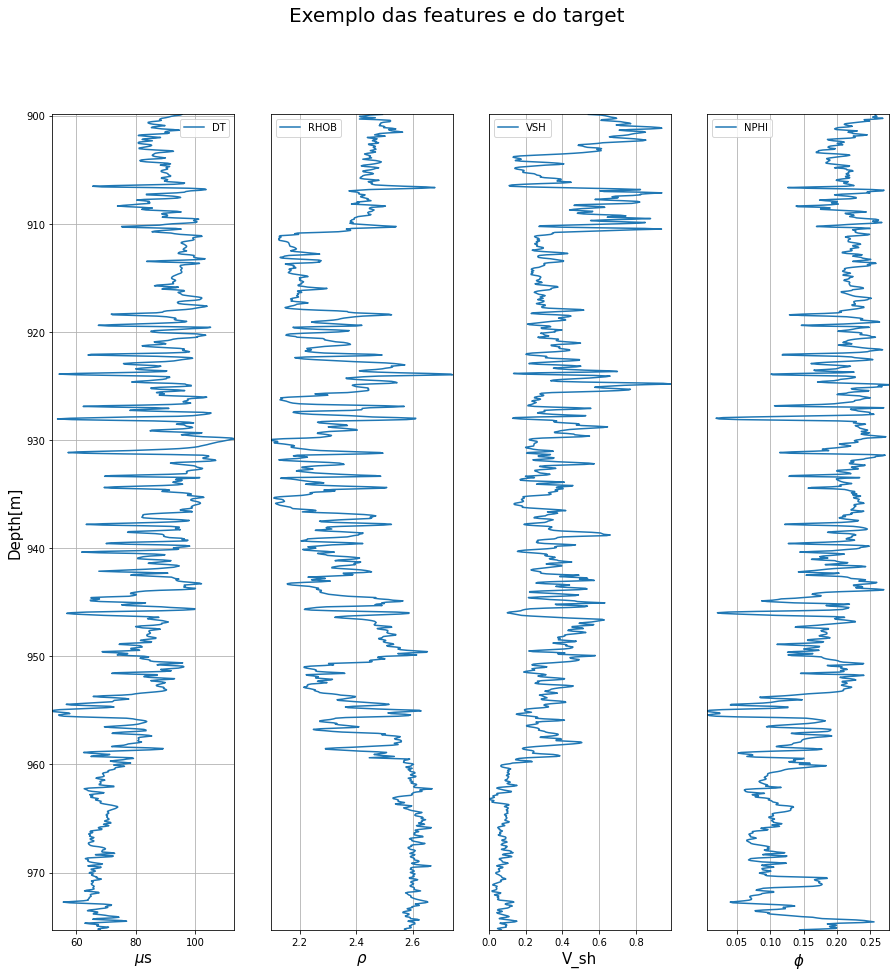

In [ ]:
#f = plt.figure(figsize=(15,12), constrained_layout=True)
f = plt.figure(figsize=(15,15))

ax1 = f.add_subplot(141)
ax1.plot(df_campos1['DT'],df_campos1['DEPTH'], label= 'DT')
#ax1.plot(np.array(VSH),np.array(depth), label= 'Vs-predito')
plt.legend(bbox_to_anchor =(0.001, 1, 1,0.001))
plt.xlim(min(df_campos1['DT']),max(df_campos1['DT']))
plt.ylim(min(df_campos1['DEPTH']),max(df_campos1['DEPTH']))
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('$\mu$s', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)

ax2 = f.add_subplot(142)
ax2.plot(df_campos1['RHOB'],df_campos1['DEPTH'], label= 'RHOB')
#ax1.plot(np.array(VSH),np.array(depth), label= 'Vs-predito')
plt.legend(bbox_to_anchor =(0.001, 1, 1,0.001))
plt.xlim(min(df_campos1['RHOB']),max(df_campos1['RHOB']))
plt.ylim(min(df_campos1['DEPTH']),max(df_campos1['DEPTH']))
plt.grid()
plt.gca().invert_yaxis()
#plt.ylabel('Depth[m]', size=15)
plt.xlabel(r"$\rho$", size=15)
#plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)
plt.yticks([])

ax3 = f.add_subplot(143)
ax3.plot(df_campos1['VSH'],df_campos1['DEPTH'], label= 'VSH')
#ax3.plot(y_blind.loc[:,['VPS']],np.array(depth_ref[0:3201]), label= 'Vs-real')
#ax1.plot(np.array(VSH),np.array(depth), label= 'Vs-predito')
plt.legend(bbox_to_anchor =(0.001, 1, 1,0.001))
plt.xlim(min(df_campos1['VSH']),max(df_campos1['VSH']))
plt.ylim(min(df_campos1['DEPTH']),max(df_campos1['DEPTH']))
plt.grid()
plt.gca().invert_yaxis()
#plt.ylabel('Depth[m]', size=15)
plt.xlabel('V_sh', size=15)
#plt.tick_params(axis='y', labelsize=10)
plt.yticks([])
plt.tick_params(axis='x', labelsize=10)

ax4 = f.add_subplot(144)
ax4.plot(df_campos1['NPHI'],df_campos1['DEPTH'], label= 'NPHI')
#ax4.plot(y_blind.loc[:,['VPS']],np.array(depth_ref[0:3201]), label= 'Vs-real')
#ax1.plot(np.array(VSH),np.array(depth), label= 'Vs-predito')
plt.legend(bbox_to_anchor =(0.001, 1, 1,0.001))
plt.xlim(min(df_campos1['NPHI']),max(df_campos1['NPHI']))
plt.ylim(min(df_campos1['DEPTH']),max(df_campos1['DEPTH']))
plt.grid()
plt.gca().invert_yaxis()
#plt.ylabel('Depth[m]', size=15)
plt.xlabel('$\phi$', size=15)
#plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)
plt.yticks([])
plt.suptitle('Exemplo das features e do target', size=20)

In [ ]:
df_campos2['IGR']= (df_campos2['GR'] - min(df_campos2['GR']))/(max(df_campos2['GR']) - min(df_campos2['GR']))
df_campos2['VSH'] = 0.33*(2 ** (2* df_campos2['IGR']) -1)
df_campos2 = df_campos2[['DEPTH','DT','RHOB','GR','NPHI','VSH']]
df_campos2['NPHI'] = df_campos2['NPHI']/100
df_campos2 = df_campos2.dropna()
print(df_campos2)

         DEPTH       DT    RHOB       GR      NPHI       VSH
0    906.78000  91.2695  2.4617  66.4531  0.217996  0.282329
1    906.84096  90.9399  2.4266  68.4648  0.218086  0.305811
2    906.90192  90.3281  2.4270  69.0938  0.231367  0.313336
3    906.96288  87.7031  2.4411  67.7969  0.246211  0.297916
4    907.02384  85.2031  2.4502  67.1992  0.255234  0.290935
..         ...      ...     ...      ...       ...       ...
985  966.82560  81.2852  2.5602  46.3909  0.222695  0.090727
986  966.88656  82.2188  2.5659  45.8945  0.234141  0.086839
987  966.94752  82.2109  2.5720  45.4951  0.235820  0.083736
988  967.00848  82.2581  2.5658  45.8906  0.230938  0.086808
989  967.06944  82.4500  2.5500  46.2891  0.225000  0.089927

[990 rows x 6 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df_campos2.corr()

DEPTH        DT      RHOB        GR      NPHI       VSH
DEPTH  1.000000 -0.255423  0.064312 -0.462181 -0.157306 -0.449788
DT    -0.255423  1.000000 -0.397173  0.331343  0.586610  0.307903
RHOB   0.064312 -0.397173  1.000000  0.142470 -0.513337  0.141007
GR    -0.462181  0.331343  0.142470  1.000000  0.360460  0.987093
NPHI  -0.157306  0.586610 -0.513337  0.360460  1.000000  0.335580
VSH   -0.449788  0.307903  0.141007  0.987093  0.335580  1.000000

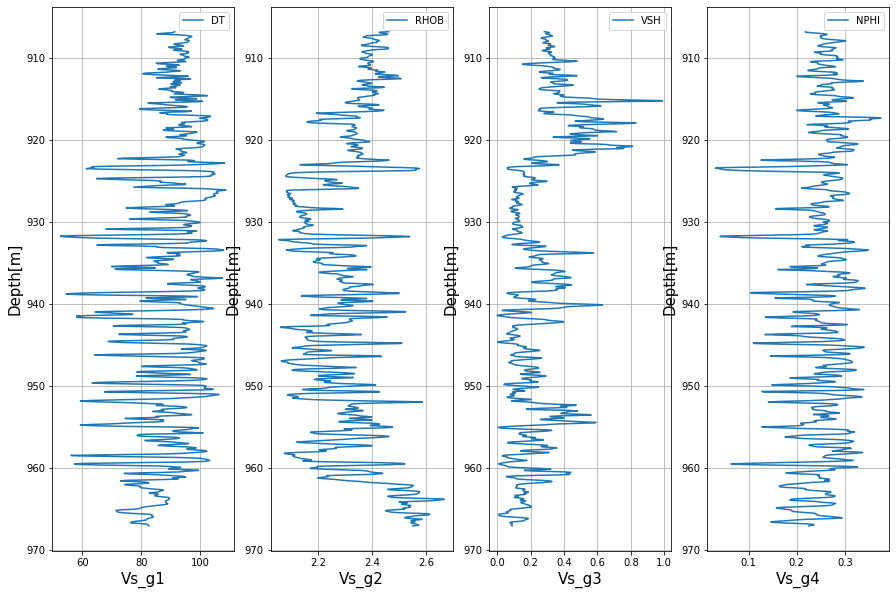

In [ ]:
f = plt.figure(figsize=(15,10))

ax1 = f.add_subplot(141)
ax1.plot(df_campos2['DT'],df_campos2['DEPTH'], label= 'DT')
#ax1.plot(np.array(VSH),np.array(depth), label= 'Vs-predito')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('Vs_g1', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)

ax2 = f.add_subplot(142)
ax2.plot(df_campos2['RHOB'],df_campos2['DEPTH'], label= 'RHOB')
#ax1.plot(np.array(VSH),np.array(depth), label= 'Vs-predito')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('Vs_g2', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)

ax3 = f.add_subplot(143)
ax3.plot(df_campos2['VSH'],df_campos2['DEPTH'], label= 'VSH')
#ax3.plot(y_blind.loc[:,['VPS']],np.array(depth_ref[0:3201]), label= 'Vs-real')
#ax1.plot(np.array(VSH),np.array(depth), label= 'Vs-predito')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('Vs_g3', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)

ax4 = f.add_subplot(144)
ax4.plot(df_campos2['NPHI'],df_campos2['DEPTH'], label= 'NPHI')
#ax4.plot(y_blind.loc[:,['VPS']],np.array(depth_ref[0:3201]), label= 'Vs-real')
#ax1.plot(np.array(VSH),np.array(depth), label= 'Vs-predito')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('Vs_g4', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)


In [ ]:
df_campos3['IGR']= (df_campos3['GR'] - min(df_campos3['GR']))/(max(df_campos3['GR']) - min(df_campos3['GR']))
df_campos3['VSH'] = 0.33*(2 ** (2* df_campos3['IGR']) -1)
df_campos3 = df_campos3[['DEPTH','DT','RHOB','GR','NPHI','VSH']]
df_campos3['NPHI'] = df_campos3['NPHI']/100
df_campos3 = df_campos3.dropna()
print(df_campos3)

         DEPTH       DT    RHOB       GR      NPHI       VSH
0    899.22096  89.1641  2.4984  78.4492  0.247969  0.376472
1    899.28192  90.4185  2.4950  80.2617  0.258906  0.393928
2    899.34288  89.5469  2.4832  82.2031  0.262795  0.413105
3    899.40384  88.5078  2.4728  82.6934  0.258828  0.418027
4    899.46480  88.7383  2.4691  82.7773  0.255601  0.418873
..         ...      ...     ...      ...       ...       ...
994  959.81520  71.1250  2.5452  29.9727  0.168438  0.037770
995  959.87616  71.9922  2.5378  32.2656  0.160547  0.049304
996  959.93712  69.9453  2.5613  33.1680  0.142500  0.053941
997  959.99808  66.5195  2.5817  31.7266  0.116016  0.046560
998  960.05904  63.1445  2.5874  28.1406  0.085781  0.028808

[999 rows x 6 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df_campos3.corr()

DEPTH        DT      RHOB        GR      NPHI       VSH
DEPTH  1.000000 -0.513897  0.096560 -0.621281 -0.491046 -0.570690
DT    -0.513897  1.000000 -0.733678  0.585179  0.839329  0.495247
RHOB   0.096560 -0.733678  1.000000 -0.279552 -0.681839 -0.196287
GR    -0.621281  0.585179 -0.279552  1.000000  0.577892  0.979855
NPHI  -0.491046  0.839329 -0.681839  0.577892  1.000000  0.501396
VSH   -0.570690  0.495247 -0.196287  0.979855  0.501396  1.000000

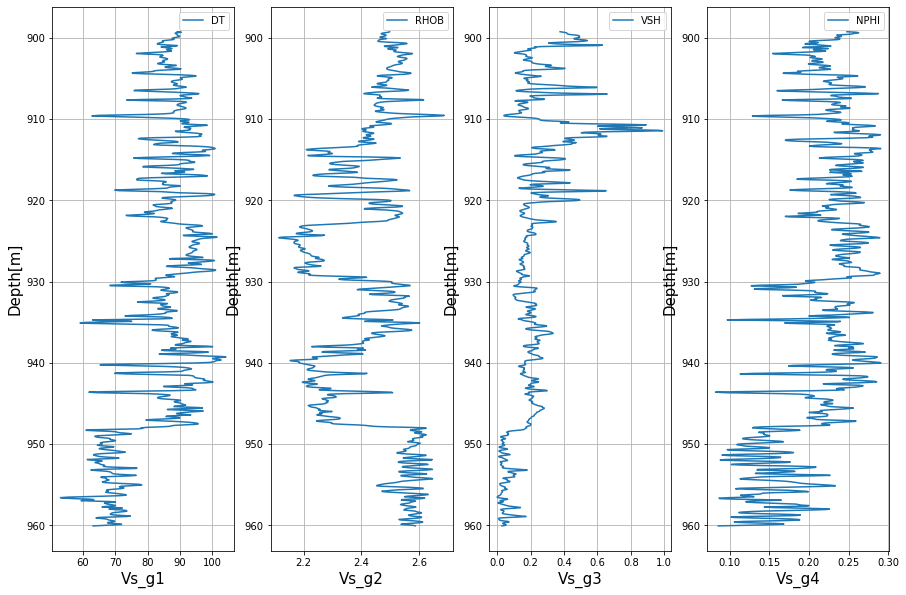

In [ ]:
f = plt.figure(figsize=(15,10))

ax1 = f.add_subplot(141)
ax1.plot(df_campos3['DT'],df_campos3['DEPTH'], label= 'DT')
#ax1.plot(np.array(VSH),np.array(depth), label= 'Vs-predito')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('Vs_g1', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)

ax2 = f.add_subplot(142)
ax2.plot(df_campos3['RHOB'],df_campos3['DEPTH'], label= 'RHOB')
#ax1.plot(np.array(VSH),np.array(depth), label= 'Vs-predito')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('Vs_g2', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)

ax3 = f.add_subplot(143)
ax3.plot(df_campos3['VSH'],df_campos3['DEPTH'], label= 'VSH')
#ax3.plot(y_blind.loc[:,['VPS']],np.array(depth_ref[0:3201]), label= 'Vs-real')
#ax1.plot(np.array(VSH),np.array(depth), label= 'Vs-predito')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('Vs_g3', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)

ax4 = f.add_subplot(144)
ax4.plot(df_campos3['NPHI'],df_campos3['DEPTH'], label= 'NPHI')
#ax4.plot(y_blind.loc[:,['VPS']],np.array(depth_ref[0:3201]), label= 'Vs-real')
#ax1.plot(np.array(VSH),np.array(depth), label= 'Vs-predito')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('Vs_g4', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)


In [ ]:
df_campos4['IGR']= (df_campos4['GR'] - min(df_campos4['GR']))/(max(df_campos4['GR']) - min(df_campos4['GR']))
df_campos4['VSH'] = 0.33*(2 ** (2* df_campos4['IGR']) -1)
df_campos4 = df_campos4[['DEPTH','DT','RHOB','GR','NPHI','VSH']]
df_campos4 = df_campos4.dropna()
df_campos2['NPHI'] = df_campos2['NPHI']/100

In [ ]:
df_campos4.corr()

DEPTH        DT      RHOB        GR      NPHI       VSH
DEPTH  1.000000  0.020593 -0.446854 -0.333552  0.041074 -0.339275
DT     0.020593  1.000000 -0.611973  0.161138  0.726077  0.143446
RHOB  -0.446854 -0.611973  1.000000  0.130098 -0.538466  0.143546
GR    -0.333552  0.161138  0.130098  1.000000  0.235644  0.986432
NPHI   0.041074  0.726077 -0.538466  0.235644  1.000000  0.215877
VSH   -0.339275  0.143446  0.143546  0.986432  0.215877  1.000000

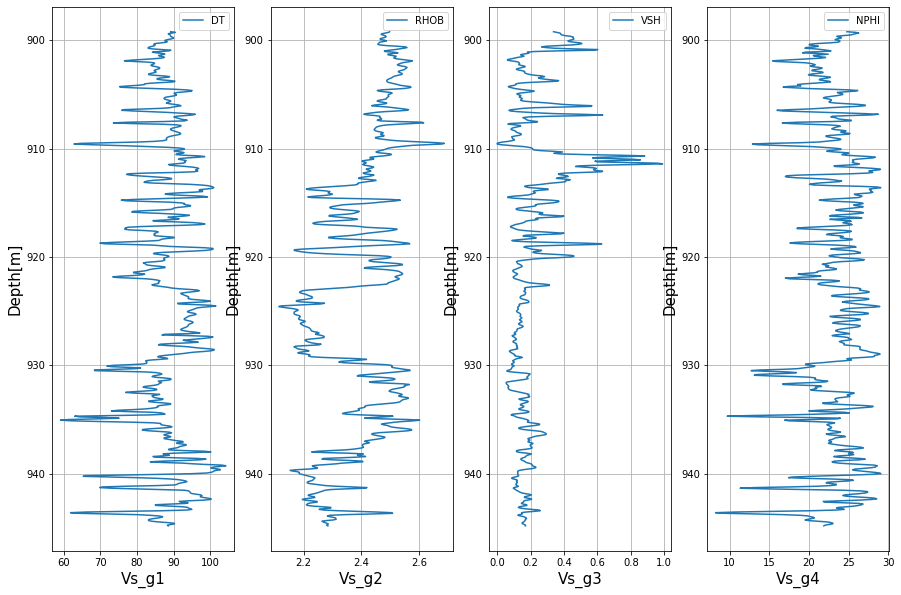

In [ ]:
f = plt.figure(figsize=(15,10))

ax1 = f.add_subplot(141)
ax1.plot(df_campos4['DT'],df_campos4['DEPTH'], label= 'DT')
#ax1.plot(np.array(VSH),np.array(depth), label= 'Vs-predito')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('Vs_g1', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)

ax2 = f.add_subplot(142)
ax2.plot(df_campos4['RHOB'],df_campos4['DEPTH'], label= 'RHOB')
#ax1.plot(np.array(VSH),np.array(depth), label= 'Vs-predito')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('Vs_g2', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)

ax3 = f.add_subplot(143)
ax3.plot(df_campos4['VSH'],df_campos4['DEPTH'], label= 'VSH')
#ax3.plot(y_blind.loc[:,['VPS']],np.array(depth_ref[0:3201]), label= 'Vs-real')
#ax1.plot(np.array(VSH),np.array(depth), label= 'Vs-predito')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('Vs_g3', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)

ax4 = f.add_subplot(144)
ax4.plot(df_campos4['NPHI'],df_campos4['DEPTH'], label= 'NPHI')
#ax4.plot(y_blind.loc[:,['VPS']],np.array(depth_ref[0:3201]), label= 'Vs-real')
#ax1.plot(np.array(VSH),np.array(depth), label= 'Vs-predito')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('Vs_g4', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)


In [ ]:
df_campos5['IGR']= (df_campos5['GR'] - min(df_campos5['GR']))/(max(df_campos5['GR']) - min(df_campos5['GR']))
df_campos5['VSH'] = 0.33*(2 ** (2* df_campos5['IGR']) -1)
df_campos5 = df_campos5[['DEPTH','DT','RHOB','GR','NPHI','VSH']]
df_campos5 = df_campos5.dropna()
df_campos5['NPHI'] = df_campos5['NPHI']/100

In [ ]:
df_campos5.corr()

DEPTH        DT      RHOB        GR      NPHI       VSH
DEPTH  1.000000 -0.731200  0.553036 -0.641081 -0.727660 -0.588003
DT    -0.731200  1.000000 -0.739897  0.644817  0.889507  0.591111
RHOB   0.553036 -0.739897  1.000000 -0.362441 -0.812770 -0.286320
GR    -0.641081  0.644817 -0.362441  1.000000  0.669396  0.985492
NPHI  -0.727660  0.889507 -0.812770  0.669396  1.000000  0.605398
VSH   -0.588003  0.591111 -0.286320  0.985492  0.605398  1.000000

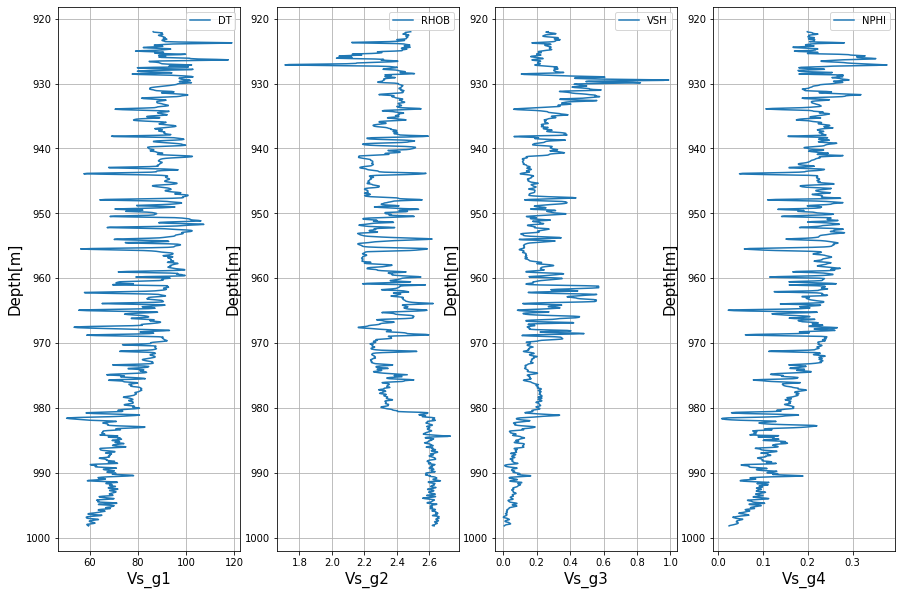

In [ ]:
f = plt.figure(figsize=(15,10))

ax1 = f.add_subplot(141)
ax1.plot(df_campos5['DT'],df_campos5['DEPTH'], label= 'DT')
#ax1.plot(np.array(VSH),np.array(depth), label= 'Vs-predito')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('Vs_g1', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)

ax2 = f.add_subplot(142)
ax2.plot(df_campos5['RHOB'],df_campos5['DEPTH'], label= 'RHOB')
#ax1.plot(np.array(VSH),np.array(depth), label= 'Vs-predito')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('Vs_g2', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)

ax3 = f.add_subplot(143)
ax3.plot(df_campos5['VSH'],df_campos5['DEPTH'], label= 'VSH')
#ax3.plot(y_blind.loc[:,['VPS']],np.array(depth_ref[0:3201]), label= 'Vs-real')
#ax1.plot(np.array(VSH),np.array(depth), label= 'Vs-predito')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('Vs_g3', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)

ax4 = f.add_subplot(144)
ax4.plot(df_campos5['NPHI'],df_campos5['DEPTH'], label= 'NPHI')
#ax4.plot(y_blind.loc[:,['VPS']],np.array(depth_ref[0:3201]), label= 'Vs-real')
#ax1.plot(np.array(VSH),np.array(depth), label= 'Vs-predito')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('Vs_g4', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)


In [ ]:
df_campos6['IGR']= (df_campos6['GR'] - min(df_campos6['GR']))/(max(df_campos6['GR']) - min(df_campos6['GR']))
df_campos6['VSH'] = 0.33*(2 ** (2* df_campos6['IGR']) -1)
df_campos6 = df_campos6[['DEPTH','DT','RHOB','GR','NPHI','VSH']]
df_campos6 = df_campos6.dropna()
df_campos6['NPHI'] = df_campos6['NPHI']/100
print(df_campos6)

         DEPTH       DT    RHOB       GR      NPHI       VSH
0    914.40000  87.9922  2.4475  71.0039  0.234688  0.272935
1    914.46096  89.0195  2.4445  71.7539  0.230747  0.277812
2    914.52192  91.1875  2.4376  75.1250  0.238711  0.300227
3    914.58288  93.2266  2.4306  83.2500  0.263164  0.357708
4    914.64384  94.8359  2.4209  95.2500  0.268867  0.452328
..         ...      ...     ...      ...       ...       ...
995  975.05520  62.8359  2.5313  20.9375  0.105508  0.022119
996  975.11616  63.1836  2.5034  20.8906  0.117266  0.021941
997  975.17712  64.7891  2.4651  19.0977  0.134414  0.015228
998  975.23808  66.3906  2.4485  17.4375  0.141941  0.009125
999  975.29904  66.9297  2.4578  16.9390  0.133945  0.007314

[1000 rows x 6 columns]


In [ ]:
df_campos6.corr()

DEPTH        DT      RHOB        GR      NPHI       VSH
DEPTH  1.000000 -0.790122  0.324950 -0.660984 -0.738824 -0.581013
DT    -0.790122  1.000000 -0.540237  0.742141  0.926637  0.677798
RHOB   0.324950 -0.540237  1.000000 -0.370776 -0.602877 -0.374770
GR    -0.660984  0.742141 -0.370776  1.000000  0.723011  0.980575
NPHI  -0.738824  0.926637 -0.602877  0.723011  1.000000  0.668825
VSH   -0.581013  0.677798 -0.374770  0.980575  0.668825  1.000000

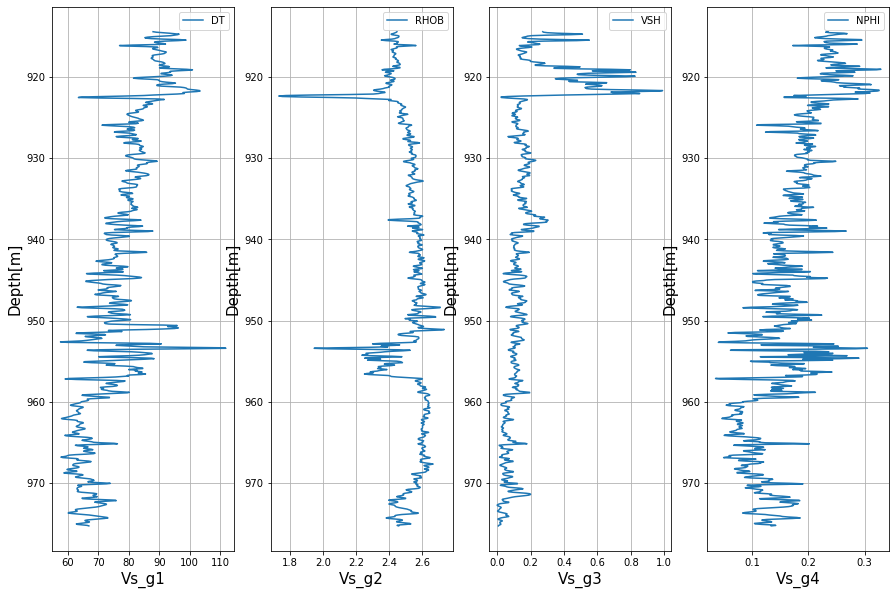

In [ ]:
f = plt.figure(figsize=(15,10))

ax1 = f.add_subplot(141)
ax1.plot(df_campos6['DT'],df_campos6['DEPTH'], label= 'DT')
#ax1.plot(np.array(VSH),np.array(depth), label= 'Vs-predito')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('Vs_g1', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)

ax2 = f.add_subplot(142)
ax2.plot(df_campos6['RHOB'],df_campos6['DEPTH'], label= 'RHOB')
#ax1.plot(np.array(VSH),np.array(depth), label= 'Vs-predito')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('Vs_g2', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)

ax3 = f.add_subplot(143)
ax3.plot(df_campos6['VSH'],df_campos6['DEPTH'], label= 'VSH')
#ax3.plot(y_blind.loc[:,['VPS']],np.array(depth_ref[0:3201]), label= 'Vs-real')
#ax1.plot(np.array(VSH),np.array(depth), label= 'Vs-predito')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('Vs_g3', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)

ax4 = f.add_subplot(144)
ax4.plot(df_campos6['NPHI'],df_campos6['DEPTH'], label= 'NPHI')
#ax4.plot(y_blind.loc[:,['VPS']],np.array(depth_ref[0:3201]), label= 'Vs-real')
#ax1.plot(np.array(VSH),np.array(depth), label= 'Vs-predito')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('Vs_g4', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)


In [ ]:
df_campos7['IGR']= (df_campos7['GR'] - min(df_campos7['GR']))/(max(df_campos7['GR']) - min(df_campos7['GR']))
df_campos7['VSH'] = 0.33*(2 ** (2* df_campos7['IGR']) -1)
df_campos7 = df_campos7[['DEPTH','DT','RHOB','GR','NPHI','VSH']]
df_campos7 = df_campos7.dropna()
df_campos7['NPHI'] = df_campos7['NPHI']/100
print(df_campos7)

         DEPTH       DT        RHOB       GR    NPHI       VSH
0    899.16000  74.2422 -99999.0000  35.1445 -999.99  0.062543
1    899.22096  78.2812 -99999.0000  37.6875 -999.99  0.074396
2    899.28192  80.6602 -99999.0000  42.6875 -999.99  0.098755
3    899.34288  80.9893 -99999.0000  45.7930 -999.99  0.114618
4    899.40384  80.1719 -99999.0000  44.7070 -999.99  0.109005
..         ...      ...         ...      ...     ...       ...
870  952.19520  65.1680      2.6144  28.9609 -999.99  0.035150
871  952.25616  64.2500      2.6195  26.4727 -999.99  0.024674
872  952.31712  64.0862      2.6190  27.8242 -999.99  0.030326
873  952.37808  64.4297      2.6133  30.9258 -999.99  0.043640
874  952.43904  64.7656      2.6056  32.8633 -999.99  0.052206

[875 rows x 6 columns]


In [ ]:
df_campos7.corr()

DEPTH        DT      RHOB        GR  NPHI       VSH
DEPTH  1.000000 -0.737931  0.638630 -0.338590   NaN -0.304979
DT    -0.737931  1.000000 -0.485255  0.622395   NaN  0.576393
RHOB   0.638630 -0.485255  1.000000 -0.301246   NaN -0.316812
GR    -0.338590  0.622395 -0.301246  1.000000   NaN  0.973126
NPHI        NaN       NaN       NaN       NaN   NaN       NaN
VSH   -0.304979  0.576393 -0.316812  0.973126   NaN  1.000000

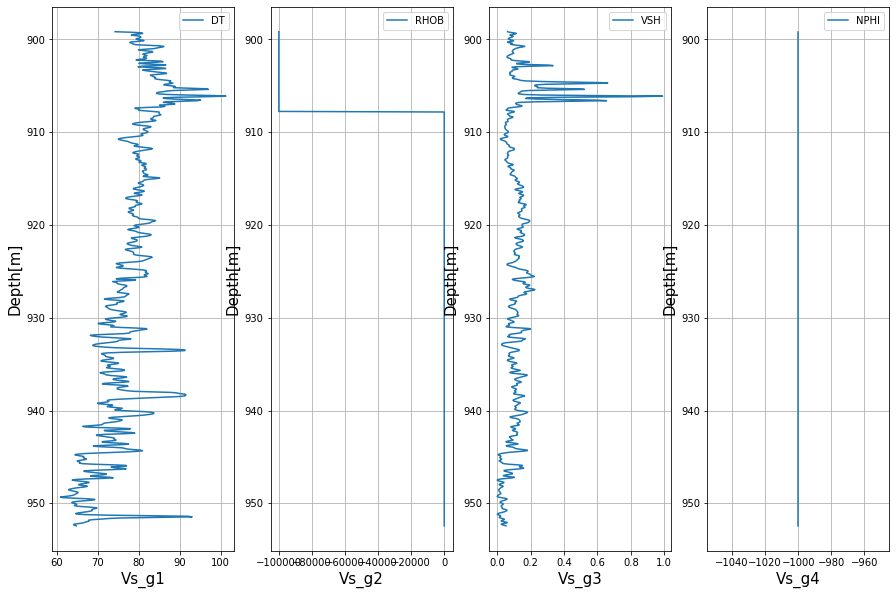

In [ ]:
f = plt.figure(figsize=(15,10))

ax1 = f.add_subplot(141)
ax1.plot(df_campos7['DT'],df_campos7['DEPTH'], label= 'DT')
#ax1.plot(np.array(VSH),np.array(depth), label= 'Vs-predito')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('Vs_g1', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)

ax2 = f.add_subplot(142)
ax2.plot(df_campos7['RHOB'],df_campos7['DEPTH'], label= 'RHOB')
#ax1.plot(np.array(VSH),np.array(depth), label= 'Vs-predito')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('Vs_g2', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)

ax3 = f.add_subplot(143)
ax3.plot(df_campos7['VSH'],df_campos7['DEPTH'], label= 'VSH')
#ax3.plot(y_blind.loc[:,['VPS']],np.array(depth_ref[0:3201]), label= 'Vs-real')
#ax1.plot(np.array(VSH),np.array(depth), label= 'Vs-predito')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('Vs_g3', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)

ax4 = f.add_subplot(144)
ax4.plot(df_campos7['NPHI'],df_campos7['DEPTH'], label= 'NPHI')
#ax4.plot(y_blind.loc[:,['VPS']],np.array(depth_ref[0:3201]), label= 'Vs-real')
#ax1.plot(np.array(VSH),np.array(depth), label= 'Vs-predito')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('Vs_g4', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)


In [ ]:
df_campos8['IGR']= (df_campos8['GR'] - min(df_campos8['GR']))/(max(df_campos8['GR']) - min(df_campos8['GR']))
df_campos8['VSH'] = 0.33*(2 ** (2* df_campos8['IGR']) -1)
df_campos8 = df_campos8[['DEPTH','DT','RHOB','GR','NPHI','VSH']]
df_campos8 = df_campos8.dropna()
df_campos8['NPHI'] = df_campos8['NPHI']/100
print(df_campos8)

         DEPTH       DT    RHOB       GR      NPHI       VSH
0    914.40000  78.7270  2.5243  51.0955  0.190355  0.418886
1    914.46096  79.0381  2.5243  53.1880  0.190355  0.457190
2    914.52192  79.9757  2.5304  56.8567  0.194286  0.529134
3    914.58288  80.8909  2.5361  59.2631  0.198533  0.579859
4    914.64384  80.7649  2.5255  56.7109  0.193575  0.526154
..         ...      ...     ...      ...       ...       ...
695  956.76720  63.2592  2.6349  43.2125  0.062675  0.290589
696  956.82816  64.5717  2.6386  49.7270  0.081894  0.394850
697  956.88912  65.1205  2.6332  50.8343  0.091624  0.414238
698  956.95008  63.9321  2.6353  42.8071  0.074319  0.284620
699  957.01104  61.6821  2.6467  36.6594  0.049132  0.200836

[700 rows x 6 columns]


In [ ]:
df_campos8.corr()

DEPTH        DT      RHOB        GR      NPHI       VSH
DEPTH  1.000000 -0.756624  0.225162 -0.539241 -0.753719 -0.524267
DT    -0.756624  1.000000 -0.675256  0.716903  0.961295  0.685524
RHOB   0.225162 -0.675256  1.000000 -0.277048 -0.600197 -0.250060
GR    -0.539241  0.716903 -0.277048  1.000000  0.735852  0.986049
NPHI  -0.753719  0.961295 -0.600197  0.735852  1.000000  0.707460
VSH   -0.524267  0.685524 -0.250060  0.986049  0.707460  1.000000

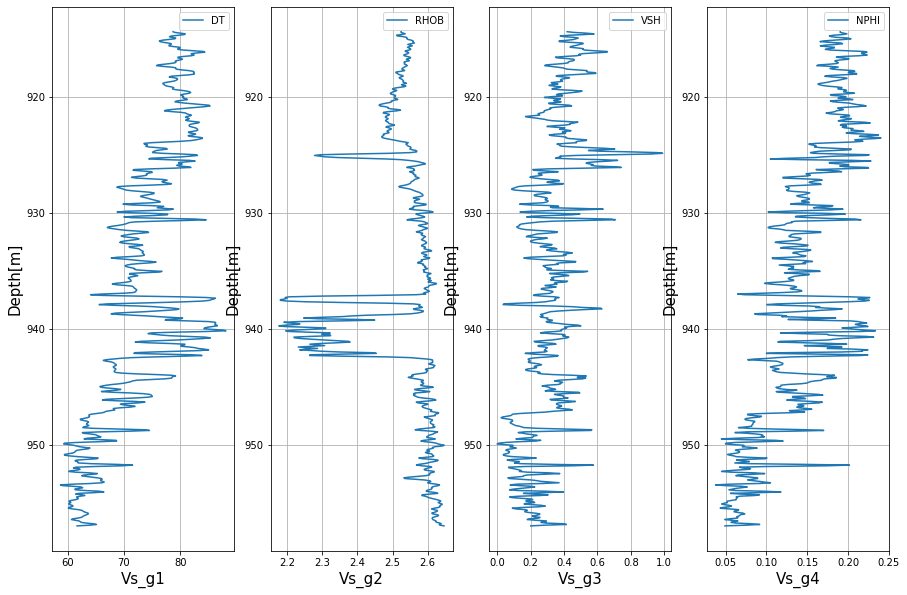

In [ ]:
f = plt.figure(figsize=(15,10))

ax1 = f.add_subplot(141)
ax1.plot(df_campos8['DT'],df_campos8['DEPTH'], label= 'DT')
#ax1.plot(np.array(VSH),np.array(depth), label= 'Vs-predito')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('Vs_g1', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)

ax2 = f.add_subplot(142)
ax2.plot(df_campos8['RHOB'],df_campos8['DEPTH'], label= 'RHOB')
#ax1.plot(np.array(VSH),np.array(depth), label= 'Vs-predito')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('Vs_g2', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)

ax3 = f.add_subplot(143)
ax3.plot(df_campos8['VSH'],df_campos8['DEPTH'], label= 'VSH')
#ax3.plot(y_blind.loc[:,['VPS']],np.array(depth_ref[0:3201]), label= 'Vs-real')
#ax1.plot(np.array(VSH),np.array(depth), label= 'Vs-predito')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('Vs_g3', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)

ax4 = f.add_subplot(144)
ax4.plot(df_campos8['NPHI'],df_campos8['DEPTH'], label= 'NPHI')
#ax4.plot(y_blind.loc[:,['VPS']],np.array(depth_ref[0:3201]), label= 'Vs-real')
#ax1.plot(np.array(VSH),np.array(depth), label= 'Vs-predito')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('Vs_g4', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)


In [ ]:
df_campos9['IGR']= (df_campos9['GR'] - min(df_campos9['GR']))/(max(df_campos9['GR']) - min(df_campos9['GR']))
df_campos9['VSH'] = 0.33*(2 ** (2* df_campos9['IGR']) -1)
df_campos9 = df_campos9[['DEPTH','DT','RHOB','GR','NPHI','VSH']]
df_campos9 = df_campos9.dropna()
df_campos9['NPHI'] = df_campos9['NPHI']/100
print(df_campos9)

           DEPTH       DT    RHOB       GR      NPHI       VSH
0      966.21600  88.1253  2.4754  93.8016  0.262098  0.492806
1      966.27696  87.3926  2.4808  95.1770  0.255355  0.506757
2      966.33792  86.6072  2.4915  97.0373  0.241592  0.526003
3      966.39888  86.0311  2.4896  96.7004  0.239862  0.522485
4      966.45984  85.7219  2.4808  95.7492  0.236840  0.512630
...          ...      ...     ...      ...       ...       ...
1145  1036.01520  63.9750  2.5611  34.2271  0.130756  0.067220
1146  1036.07616  65.9400  2.5412  25.5964  0.184572  0.027448
1147  1036.13712  69.4518  2.5175  19.8902  0.217467  0.003365
1148  1036.19808  71.5433  2.5120  20.3187  0.204012  0.005115
1149  1036.25904  71.2975  2.5135  22.2388  0.208996  0.013074

[1150 rows x 6 columns]


In [ ]:
df_campos9.corr()

DEPTH        DT      RHOB        GR      NPHI       VSH
DEPTH  1.000000 -0.553851  0.366713 -0.542394 -0.441338 -0.490272
DT    -0.553851  1.000000 -0.711238  0.556946  0.800168  0.493823
RHOB   0.366713 -0.711238  1.000000 -0.296567 -0.574523 -0.218489
GR    -0.542394  0.556946 -0.296567  1.000000  0.532755  0.979350
NPHI  -0.441338  0.800168 -0.574523  0.532755  1.000000  0.469837
VSH   -0.490272  0.493823 -0.218489  0.979350  0.469837  1.000000

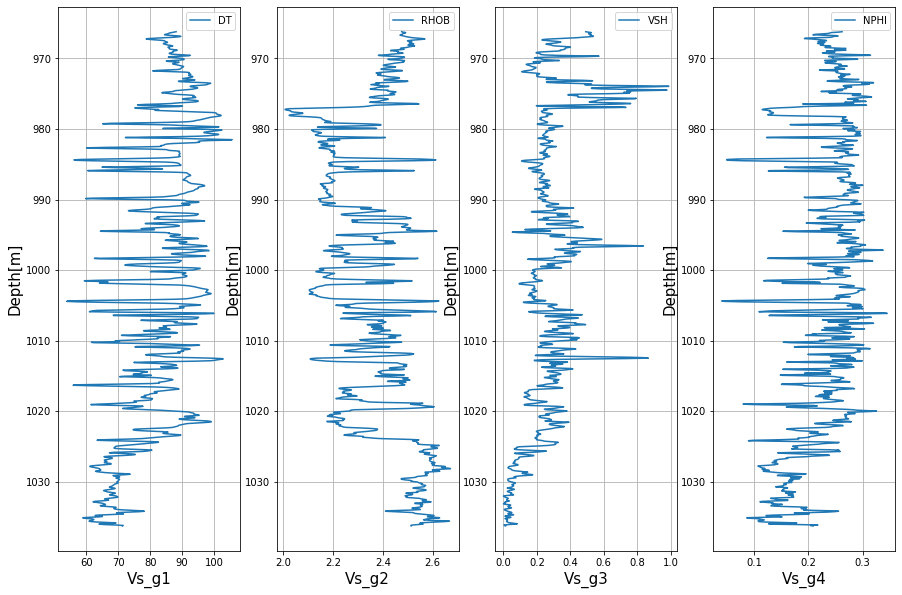

In [ ]:
f = plt.figure(figsize=(15,10))

ax1 = f.add_subplot(141)
ax1.plot(df_campos9['DT'],df_campos9['DEPTH'], label= 'DT')
#ax1.plot(np.array(VSH),np.array(depth), label= 'Vs-predito')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('Vs_g1', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)

ax2 = f.add_subplot(142)
ax2.plot(df_campos9['RHOB'],df_campos9['DEPTH'], label= 'RHOB')
#ax1.plot(np.array(VSH),np.array(depth), label= 'Vs-predito')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('Vs_g2', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)

ax3 = f.add_subplot(143)
ax3.plot(df_campos9['VSH'],df_campos9['DEPTH'], label= 'VSH')
#ax3.plot(y_blind.loc[:,['VPS']],np.array(depth_ref[0:3201]), label= 'Vs-real')
#ax1.plot(np.array(VSH),np.array(depth), label= 'Vs-predito')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('Vs_g3', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)

ax4 = f.add_subplot(144)
ax4.plot(df_campos9['NPHI'],df_campos9['DEPTH'], label= 'NPHI')
#ax4.plot(y_blind.loc[:,['VPS']],np.array(depth_ref[0:3201]), label= 'Vs-real')
#ax1.plot(np.array(VSH),np.array(depth), label= 'Vs-predito')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('Vs_g4', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)


In [ ]:
df_campos10['IGR']= (df_campos10['GR'] - min(df_campos10['GR']))/(max(df_campos10['GR']) - min(df_campos10['GR']))
df_campos10['VSH'] = 0.33*(2 ** (2* df_campos10['IGR']) -1)
df_campos10 = df_campos10[['DEPTH','DT','RHOB','GR','NPHI','VSH']]
df_campos10 = df_campos10.dropna()
df_campos10['NPHI'] = df_campos2['NPHI']/100
print(df_campos10)

         DEPTH       DT    RHOB       GR      NPHI       VSH
0    896.11200  84.1809  2.4247  84.5625  0.000022  0.504631
1    896.17296  84.6133  2.4286  77.0625  0.000022  0.401816
2    896.23392  85.5000  2.4221  69.1250  0.000023  0.306764
3    896.29488  85.4922  2.4231  61.5000  0.000025  0.227101
4    896.35584  84.5234  2.4478  53.7500  0.000026  0.156338
..         ...      ...     ...      ...       ...       ...
769  942.99024  77.7107  2.5585  47.6680  0.000027  0.107159
770  943.05120  77.4844  2.5601  48.4219  0.000026  0.112974
771  943.11216  76.5039  2.5651  47.7188  0.000025  0.107548
772  943.17312  74.6016  2.5791  44.8906  0.000025  0.086387
773  943.23408  71.6680  2.5994  41.3320  0.000026  0.061208

[774 rows x 6 columns]


In [ ]:
df_campos10.corr()

DEPTH        DT      RHOB        GR      NPHI       VSH
DEPTH  1.000000 -0.312891  0.041596 -0.369900 -0.068438 -0.365095
DT    -0.312891  1.000000 -0.684553  0.465358  0.113945  0.428362
RHOB   0.041596 -0.684553  1.000000 -0.216000 -0.021487 -0.166971
GR    -0.369900  0.465358 -0.216000  1.000000  0.072496  0.983212
NPHI  -0.068438  0.113945 -0.021487  0.072496  1.000000  0.076382
VSH   -0.365095  0.428362 -0.166971  0.983212  0.076382  1.000000

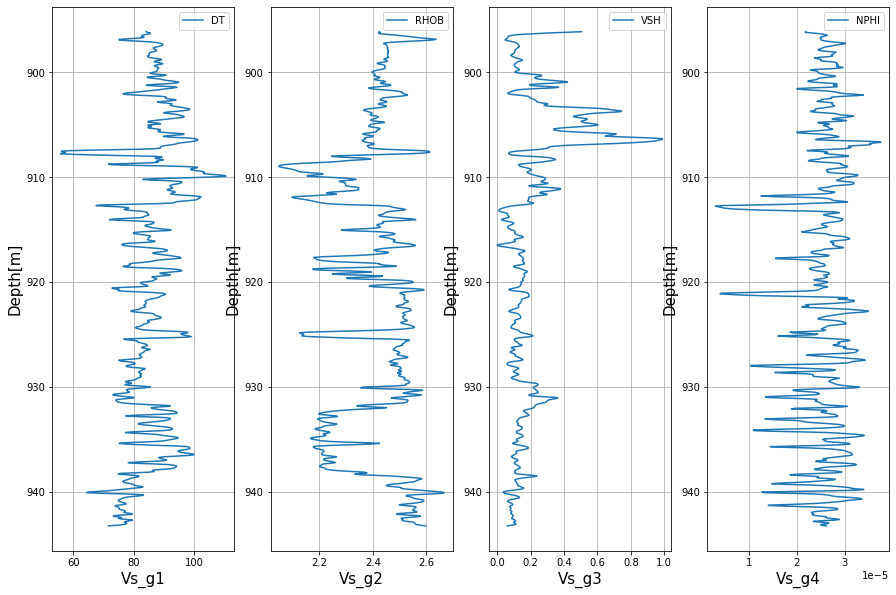

In [ ]:
f = plt.figure(figsize=(15,10))

ax1 = f.add_subplot(141)
ax1.plot(df_campos10['DT'],df_campos10['DEPTH'], label= 'DT')
#ax1.plot(np.array(VSH),np.array(depth), label= 'Vs-predito')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('Vs_g1', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)

ax2 = f.add_subplot(142)
ax2.plot(df_campos10['RHOB'],df_campos10['DEPTH'], label= 'RHOB')
#ax1.plot(np.array(VSH),np.array(depth), label= 'Vs-predito')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('Vs_g2', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)

ax3 = f.add_subplot(143)
ax3.plot(df_campos10['VSH'],df_campos10['DEPTH'], label= 'VSH')
#ax3.plot(y_blind.loc[:,['VPS']],np.array(depth_ref[0:3201]), label= 'Vs-real')
#ax1.plot(np.array(VSH),np.array(depth), label= 'Vs-predito')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('Vs_g3', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)

ax4 = f.add_subplot(144)
ax4.plot(df_campos10['NPHI'],df_campos10['DEPTH'], label= 'NPHI')
#ax4.plot(y_blind.loc[:,['VPS']],np.array(depth_ref[0:3201]), label= 'Vs-real')
#ax1.plot(np.array(VSH),np.array(depth), label= 'Vs-predito')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('Vs_g4', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)


In [ ]:
df_campos11['IGR']= (df_campos11['GR'] - min(df_campos11['GR']))/(max(df_campos11['GR']) - min(df_campos11['GR']))
df_campos11['VSH'] = 0.33*(2 ** (2* df_campos11['IGR']) -1)
df_campos11 = df_campos11[['DEPTH','DT','RHOB','GR','NPHI','VSH']]
df_campos11 = df_campos11.dropna()
df_campos11['NPHI'] = df_campos11['NPHI']/100
print(df_campos11)

          DEPTH       DT    RHOB       GR      NPHI       VSH
0     914.40000  89.2969  2.4642  72.5820  0.219316  0.300945
1     914.46096  88.9453  2.4610  71.9805  0.220078  0.295287
2     914.52192  88.4883  2.4632  71.9844  0.228398  0.295323
3     914.58288  87.8867  2.4774  73.0469  0.235898  0.305354
4     914.64384  87.8672  2.4875  75.0938  0.232500  0.325134
...         ...      ...     ...      ...       ...       ...
1070  979.62720  73.1523  2.5848  42.7109  0.165056  0.073358
1071  979.68816  73.0781  2.5930  44.5938  0.167969  0.084895
1072  979.74912  72.4336  2.6086  45.5586  0.179141  0.090934
1073  979.81008  72.2798  2.6251  45.3242  0.194102  0.089459
1074  979.87104  72.5469  2.6342  43.7188  0.210039  0.079494

[1075 rows x 6 columns]


In [ ]:
df_campos11.corr()

DEPTH        DT      RHOB        GR      NPHI       VSH
DEPTH  1.000000 -0.588634  0.238247 -0.497176 -0.408383 -0.486755
DT    -0.588634  1.000000 -0.507720  0.453464  0.501413  0.435263
RHOB   0.238247 -0.507720  1.000000 -0.216732 -0.479471 -0.170978
GR    -0.497176  0.453464 -0.216732  1.000000  0.085510  0.982835
NPHI  -0.408383  0.501413 -0.479471  0.085510  1.000000  0.087755
VSH   -0.486755  0.435263 -0.170978  0.982835  0.087755  1.000000

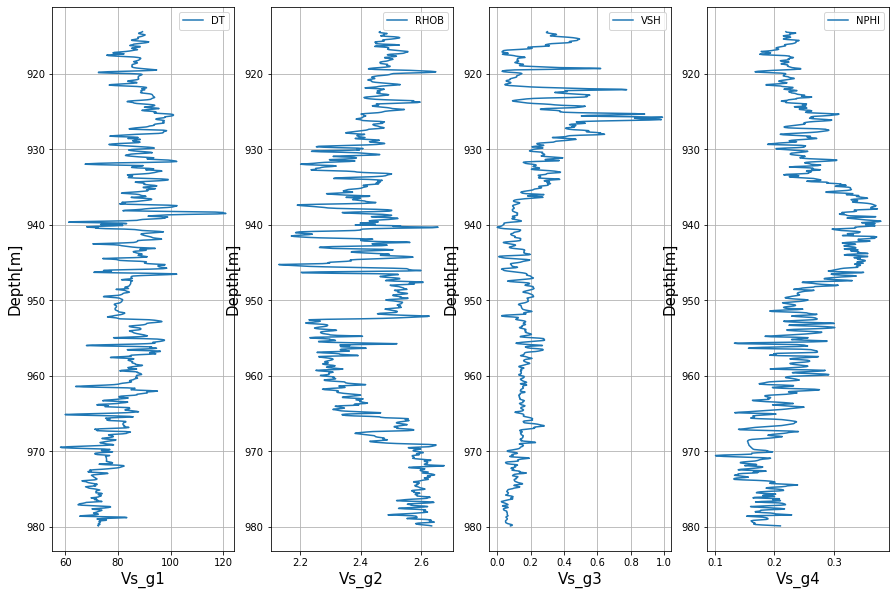

In [ ]:
f = plt.figure(figsize=(15,10))

ax1 = f.add_subplot(141)
ax1.plot(df_campos11['DT'],df_campos11['DEPTH'], label= 'DT')
#ax1.plot(np.array(VSH),np.array(depth), label= 'Vs-predito')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('Vs_g1', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)

ax2 = f.add_subplot(142)
ax2.plot(df_campos11['RHOB'],df_campos11['DEPTH'], label= 'RHOB')
#ax1.plot(np.array(VSH),np.array(depth), label= 'Vs-predito')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('Vs_g2', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)

ax3 = f.add_subplot(143)
ax3.plot(df_campos11['VSH'],df_campos11['DEPTH'], label= 'VSH')
#ax3.plot(y_blind.loc[:,['VPS']],np.array(depth_ref[0:3201]), label= 'Vs-real')
#ax1.plot(np.array(VSH),np.array(depth), label= 'Vs-predito')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('Vs_g3', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)

ax4 = f.add_subplot(144)
ax4.plot(df_campos11['NPHI'],df_campos11['DEPTH'], label= 'NPHI')
#ax4.plot(y_blind.loc[:,['VPS']],np.array(depth_ref[0:3201]), label= 'Vs-real')
#ax1.plot(np.array(VSH),np.array(depth), label= 'Vs-predito')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('Vs_g4', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)


In [ ]:
df_campos12['IGR']= (df_campos12['GR'] - min(df_campos12['GR']))/(max(df_campos12['GR']) - min(df_campos12['GR']))
df_campos12['VSH'] = 0.33*(2 ** (2* df_campos12['IGR']) -1)
df_campos12 = df_campos12[['DEPTH','DT','RHOB','GR','NPHI','VSH']]
df_campos12 = df_campos12.dropna()
df_campos12['NPHI'] = df_campos12['NPHI']/100
print(df_campos12)

          DEPTH       DT    RHOB       GR      NPHI       VSH
0     960.12000  82.9586  2.4390  80.0212  0.211481  0.512591
1     960.18096  82.6264  2.4508  78.5128  0.214563  0.490006
2     960.24192  81.8371  2.4513  78.1022  0.213117  0.483963
3     960.30288  80.9201  2.4417  78.5396  0.206843  0.490402
4     960.36384  79.9264  2.4382  78.5056  0.195448  0.489899
..          ...      ...     ...      ...       ...       ...
795  1008.58320  56.8144  2.3864  49.3232  0.071086  0.154694
796  1008.64416  52.7372  2.4068  46.3763  0.049638  0.129636
797  1008.70512  56.1662  2.3869  46.9408  0.043257  0.134334
798  1008.76608  61.6486  2.3525  50.1942  0.034804  0.162359
799  1008.82704  63.2477  2.3377  53.5044  0.026847  0.192609

[800 rows x 6 columns]


In [ ]:
df_campos12.corr()

DEPTH        DT      RHOB        GR      NPHI       VSH
DEPTH  1.000000 -0.146950 -0.326803 -0.077594 -0.110203 -0.146503
DT    -0.146950  1.000000 -0.449074  0.282821  0.826766  0.267791
RHOB  -0.326803 -0.449074  1.000000  0.005240 -0.446977  0.036017
GR    -0.077594  0.282821  0.005240  1.000000  0.345426  0.987378
NPHI  -0.110203  0.826766 -0.446977  0.345426  1.000000  0.322338
VSH   -0.146503  0.267791  0.036017  0.987378  0.322338  1.000000

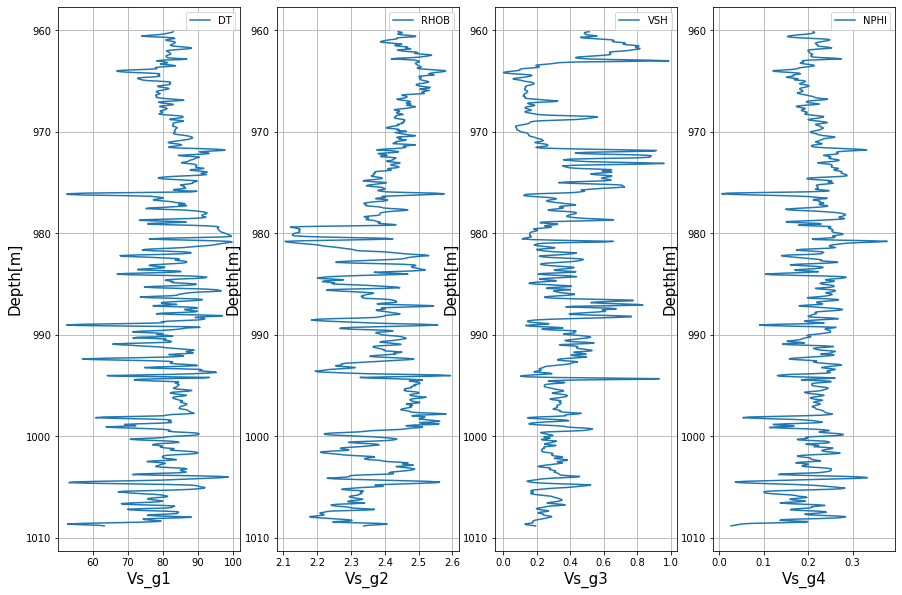

In [ ]:
f = plt.figure(figsize=(15,10))

ax1 = f.add_subplot(141)
ax1.plot(df_campos12['DT'],df_campos12['DEPTH'], label= 'DT')
#ax1.plot(np.array(VSH),np.array(depth), label= 'Vs-predito')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('Vs_g1', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)

ax2 = f.add_subplot(142)
ax2.plot(df_campos12['RHOB'],df_campos12['DEPTH'], label= 'RHOB')
#ax1.plot(np.array(VSH),np.array(depth), label= 'Vs-predito')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('Vs_g2', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)

ax3 = f.add_subplot(143)
ax3.plot(df_campos12['VSH'],df_campos12['DEPTH'], label= 'VSH')
#ax3.plot(y_blind.loc[:,['VPS']],np.array(depth_ref[0:3201]), label= 'Vs-real')
#ax1.plot(np.array(VSH),np.array(depth), label= 'Vs-predito')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('Vs_g3', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)

ax4 = f.add_subplot(144)
ax4.plot(df_campos12['NPHI'],df_campos12['DEPTH'], label= 'NPHI')
#ax4.plot(y_blind.loc[:,['VPS']],np.array(depth_ref[0:3201]), label= 'Vs-real')
#ax1.plot(np.array(VSH),np.array(depth), label= 'Vs-predito')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('Vs_g4', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)


**Verificando as correlações de forma gráfica**

In [ ]:
import matplotlib as mpl

In [ ]:
def plotCorrelacao(*dados):
    for i in dados:
        inline_rs = dict(mpl.rcParams)
        import seaborn as sns
        sns.set()
        sns.pairplot(i[['DT','RHOB','NPHI','VSH']])

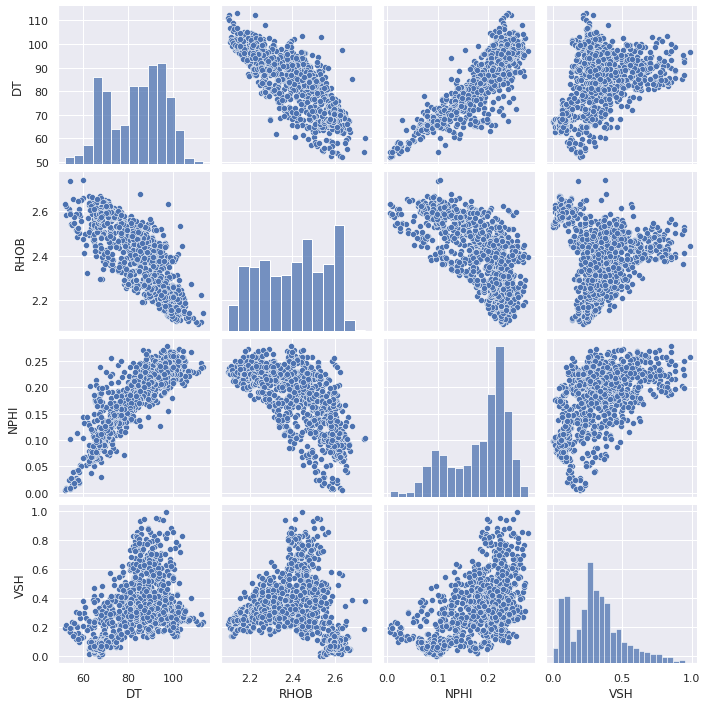

In [ ]:
plotCorrelacao(df_campos1)

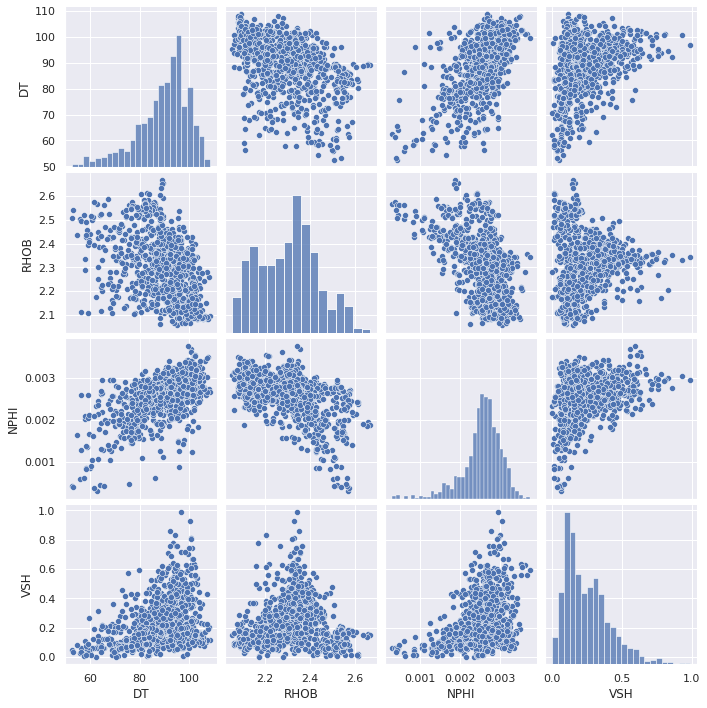

In [ ]:
plotCorrelacao(df_campos2)

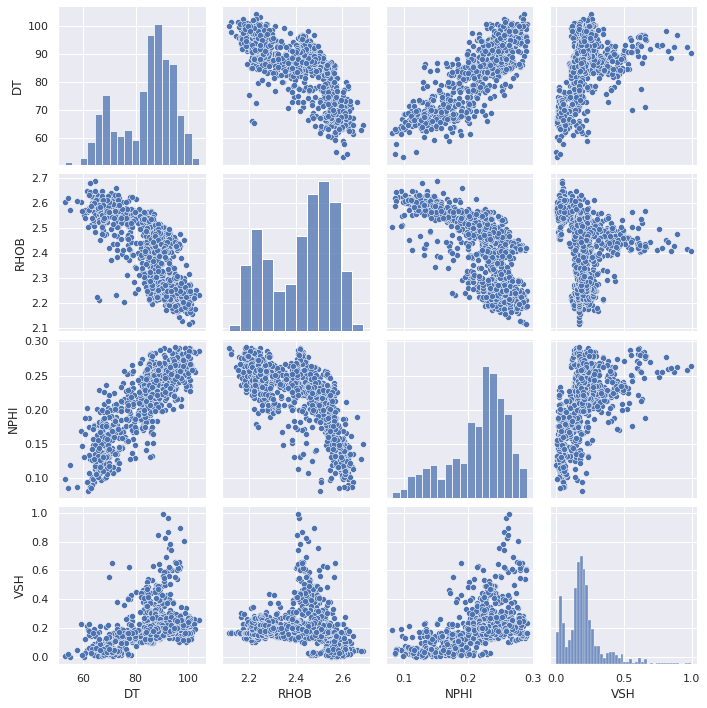

In [ ]:
plotCorrelacao(df_campos3)

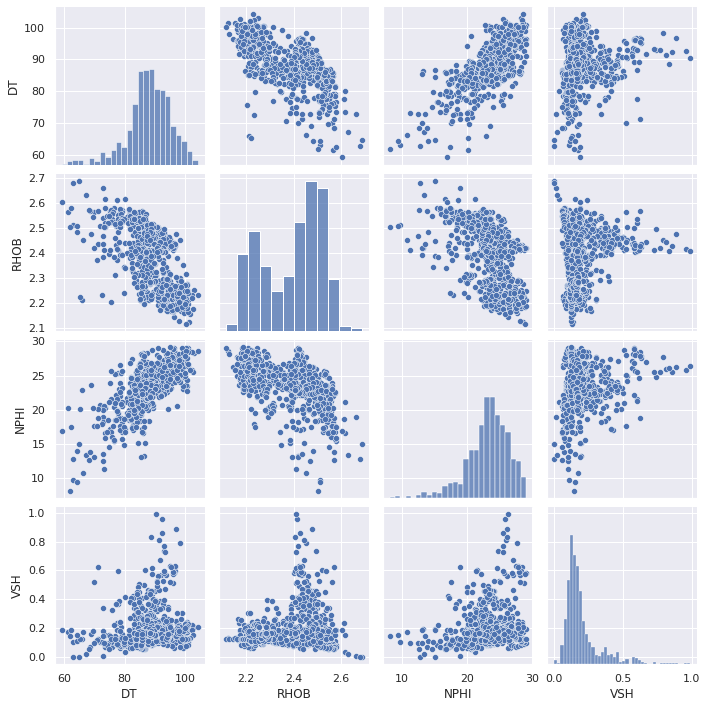

In [ ]:
plotCorrelacao(df_campos4)

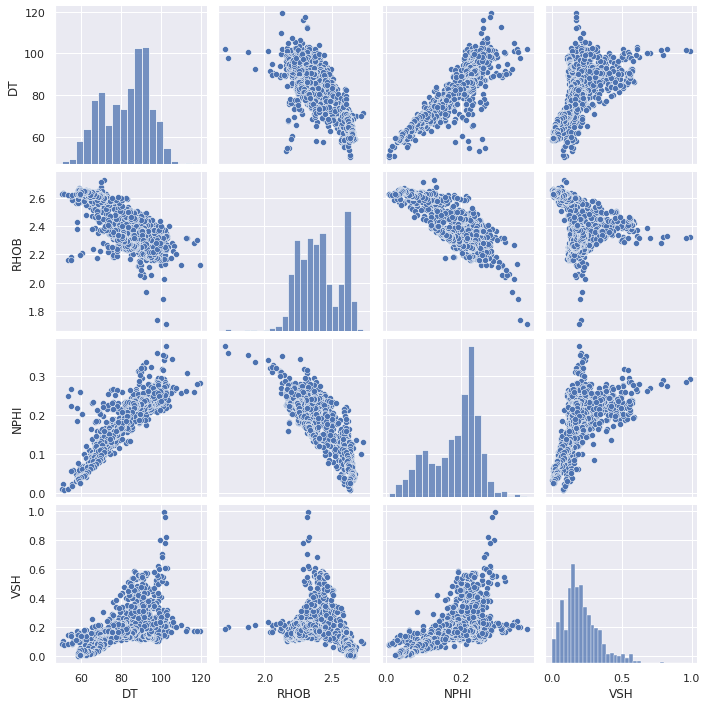

In [ ]:
plotCorrelacao(df_campos5)

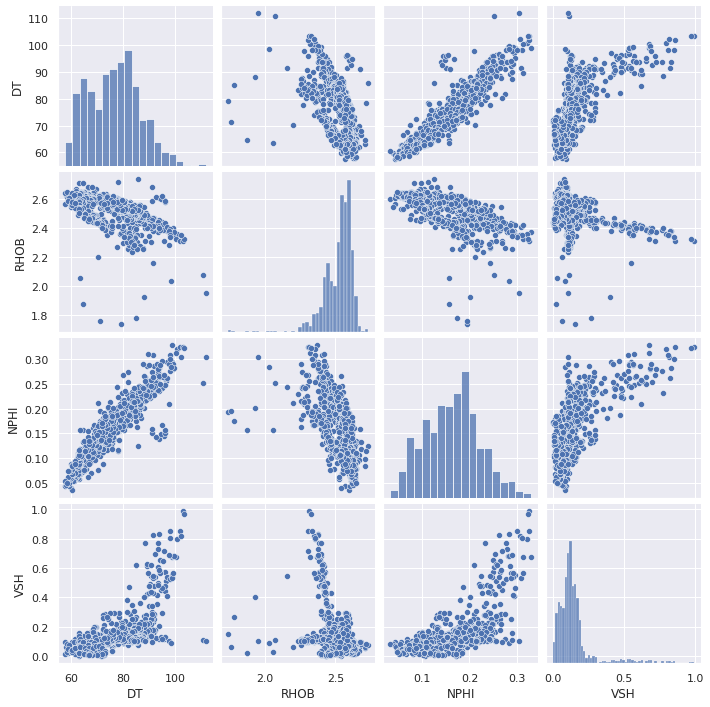

In [ ]:
plotCorrelacao(df_campos6)

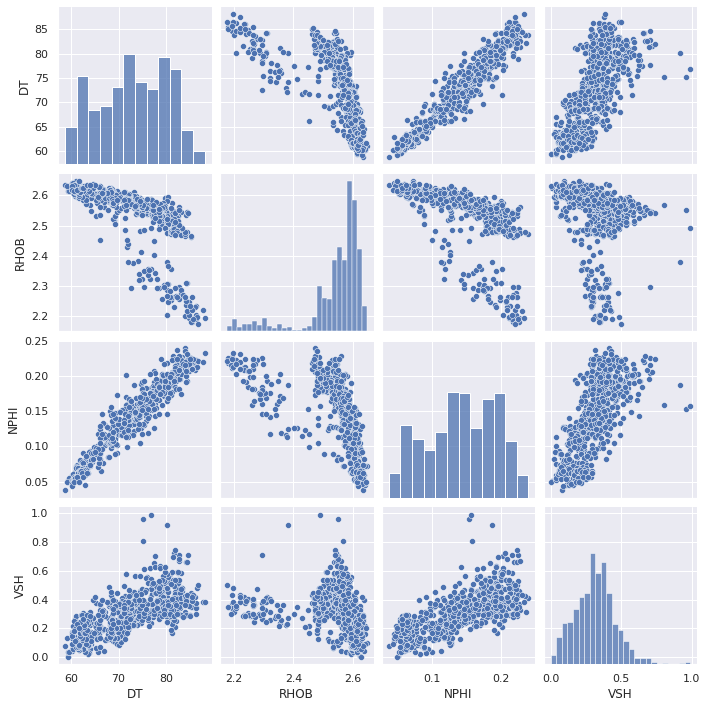

In [ ]:
plotCorrelacao(df_campos8)

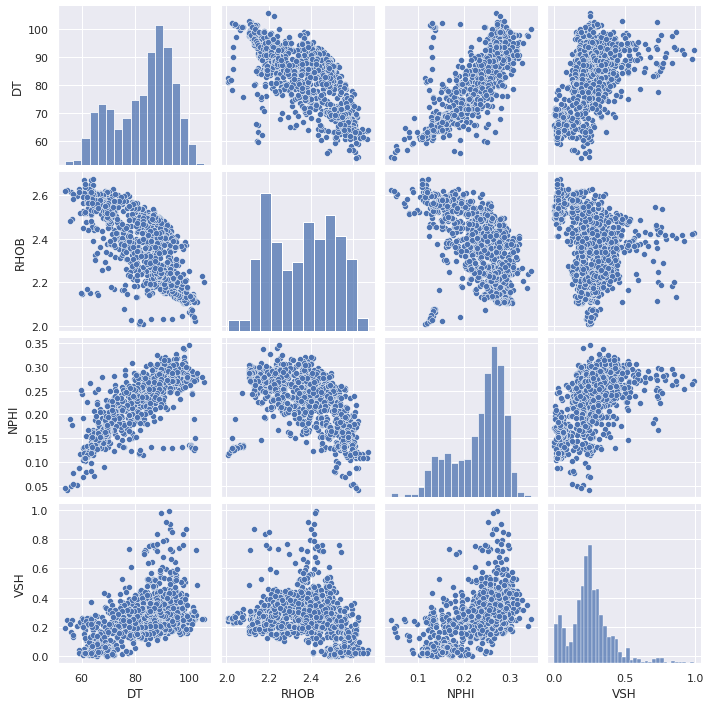

In [ ]:
plotCorrelacao(df_campos9)

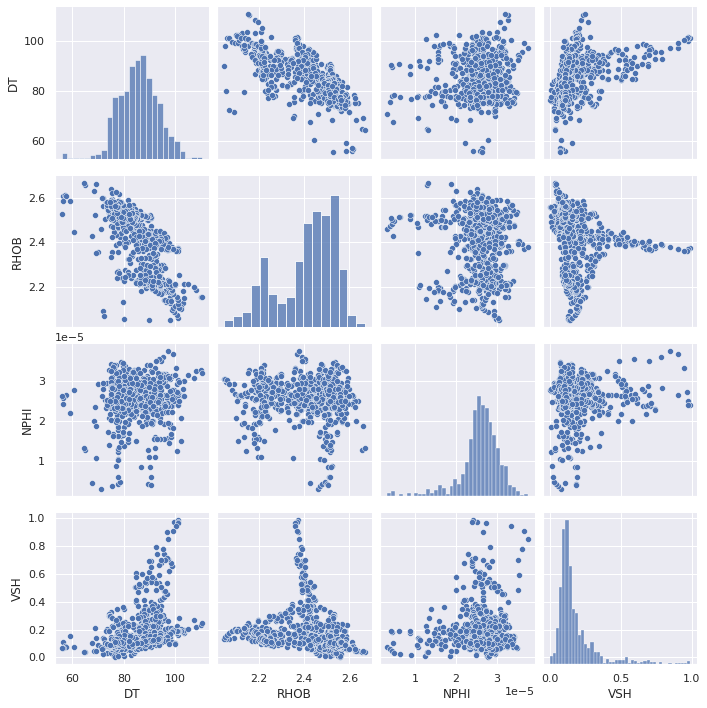

In [ ]:
plotCorrelacao(df_campos10)

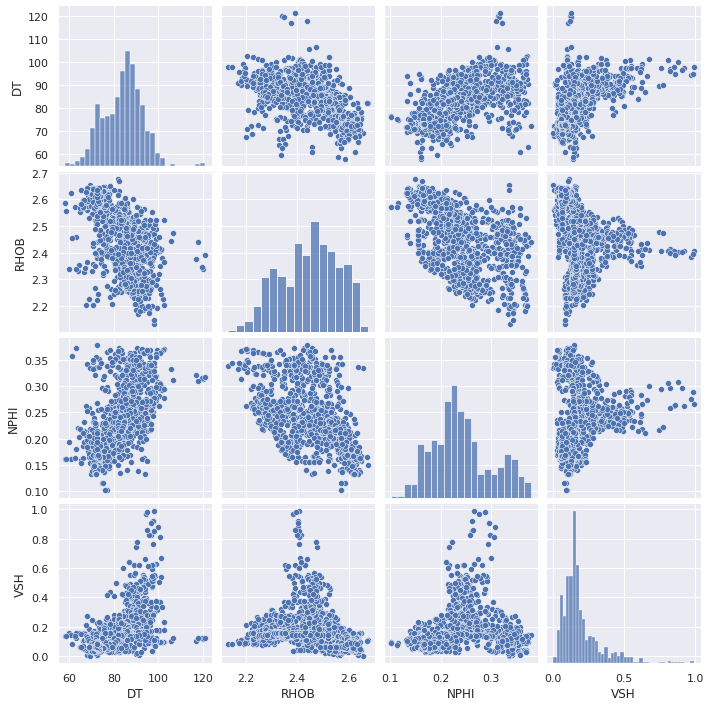

In [ ]:
plotCorrelacao(df_campos11)

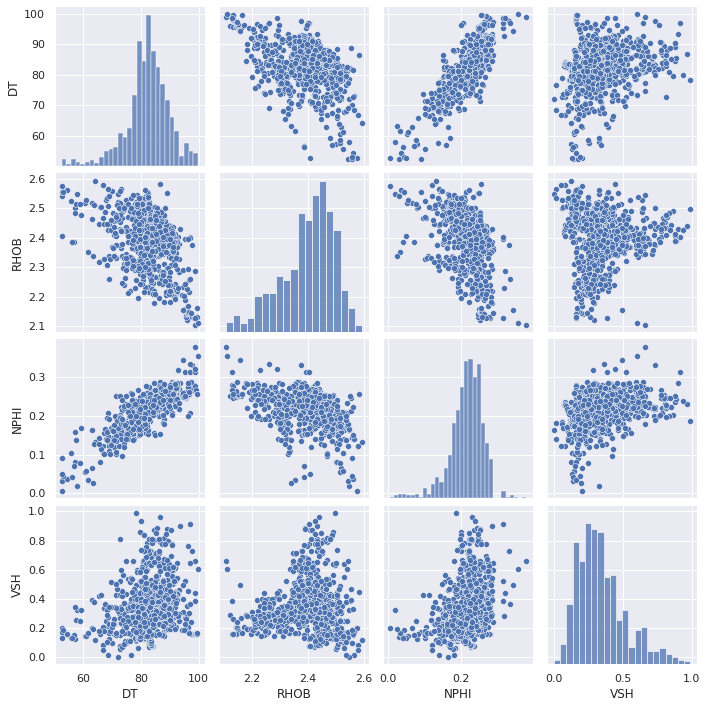

In [ ]:
plotCorrelacao(df_campos12)

In [ ]:
print('minimo',min(df_campos3['NPHI']),
'maximo',max(df_campos3['NPHI']))

minimo 0.08226599999999999 maximo 0.290859


**Usando as técnicas de ML para poços 1, 5 e 12**

In [ ]:
x1_campos = df_campos1.loc[:,['DT','RHOB','VSH']] # poco usando
x2_campos = df_campos2.loc[:,['DT','RHOB','VSH']]
x3_campos = df_campos3.loc[:,['DT','RHOB','VSH']] #blind well
x5_campos = df_campos5.loc[:,['DT','RHOB','VSH']] # poco usando
x6_campos = df_campos6.loc[:,['DT','RHOB','VSH']]
x7_campos = df_campos7.loc[:,['DT','RHOB','VSH']]
x8_campos = df_campos8.loc[:,['DT','RHOB','VSH']]
x9_campos = df_campos9.loc[:,['DT','RHOB','VSH']]
x10_campos = df_campos10.loc[:,['DT','RHOB','VSH']]
x11_campos = df_campos11.loc[:,['DT','RHOB','VSH']]
x12_campos = df_campos12.loc[:,['DT','RHOB','VSH']] # poco usando

y1_campos = df_campos1.loc[:,['NPHI']] # poco usando
y2_campos = df_campos2.loc[:,['NPHI']]
y3_campos = df_campos3.loc[:,['NPHI']] #blind well
y5_campos = df_campos5.loc[:,['NPHI']] # poco usando
y6_campos = df_campos6.loc[:,['NPHI']]
y7_campos = df_campos7.loc[:,['NPHI']]
y8_campos = df_campos8.loc[:,['NPHI']]
y9_campos = df_campos9.loc[:,['NPHI']]
y10_campos = df_campos10.loc[:,['NPHI']]
y11_campos = df_campos11.loc[:,['NPHI']]
y12_campos = df_campos12.loc[:,['NPHI']] # poco usando

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import BayesianRidge
from sklearn.gaussian_process import GaussianProcessRegressor as GaussianRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1_campos, y1_campos, test_size=0.2)
x5_train, x5_test, y5_train, y5_test = train_test_split(x5_campos, y5_campos, test_size=0.2)
x12_train, x12_test, y12_train, y12_test = train_test_split(x12_campos, y12_campos, test_size=0.2)

In [ ]:
x_ref_train = np.concatenate((x1_train,x5_train,x12_train), axis = 0)
x_ref_test  = np.concatenate((x1_test,x5_test,x12_test),axis = 0)

y_ref_train = np.concatenate((y1_train, y5_train, y12_train),axis=0)
y_ref_test = np.concatenate((y1_test, y5_test, y12_test),axis=0)

In [ ]:
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_ref_train)
x_test_scaler = scaler.transform(x_ref_test)
x_blind_scaler = scaler.transform(x3_campos)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
y_ref_train

array([[0.215938],
       [0.270703],
       [0.027539],
       ...,
       [0.331018],
       [0.261594],
       [0.28124 ]])

In [ ]:
y_ref_test.shape

(658, 1)

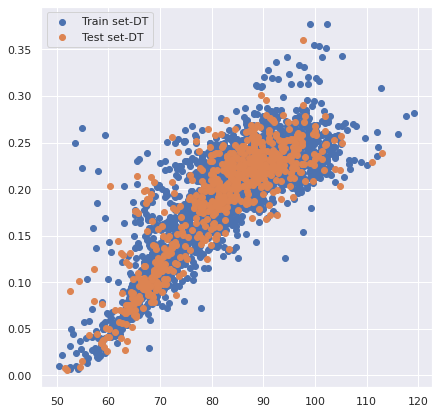

In [ ]:
fig = plt.figure(figsize = (7,7))
ax = plt.axes()

ax.scatter(x_ref_train[:,0], y_ref_train[:,0:987], label = "Train set-DT")
ax.scatter(x_ref_test[:,0], y_ref_test, label = "Test set-DT")
ax.legend()

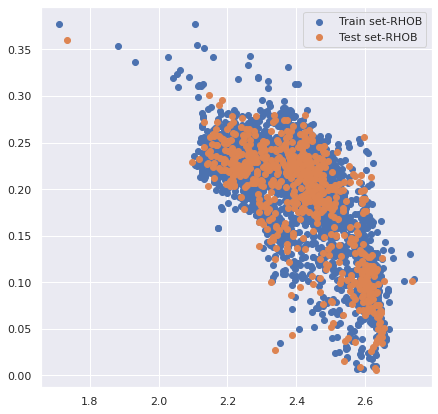

In [ ]:
fig = plt.figure(figsize = (7,7))
ax = plt.axes()

ax.scatter(x_ref_train[:,1], y_ref_train[:,0:987], label = "Train set-RHOB")
ax.scatter(x_ref_test[:,1], y_ref_test, label = "Test set-RHOB")
ax.legend()

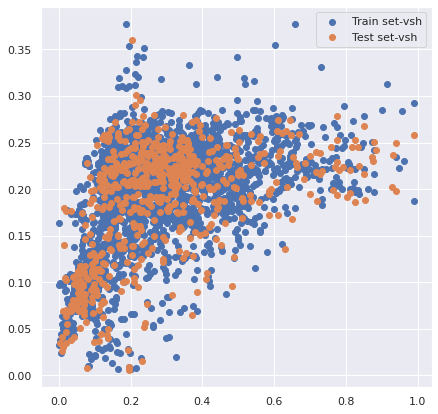

In [ ]:
fig = plt.figure(figsize = (7,7))
ax = plt.axes()

ax.scatter(x_ref_train[:,2], y_ref_train[:,0:987], label = "Train set-vsh")
ax.scatter(x_ref_test[:,2], y_ref_test, label = "Test set-vsh")
ax.legend()

In [ ]:
x_blind_scaler.shape

(999, 3)

In [ ]:
x3_campos['RHOB']

0      2.4984
1      2.4950
2      2.4832
3      2.4728
4      2.4691
        ...  
994    2.5452
995    2.5378
996    2.5613
997    2.5817
998    2.5874
Name: RHOB, Length: 999, dtype: float64

In [ ]:
x3_campos['VSH']

0      0.376472
1      0.393928
2      0.413105
3      0.418027
4      0.418873
         ...   
994    0.037770
995    0.049304
996    0.053941
997    0.046560
998    0.028808
Name: VSH, Length: 999, dtype: float64

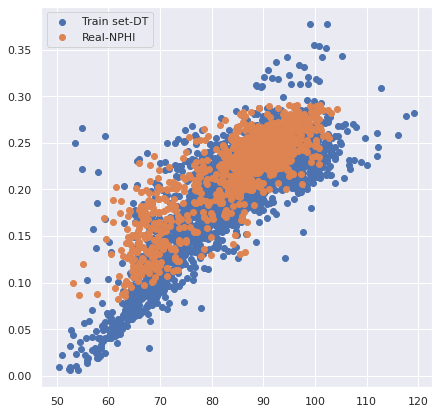

In [ ]:
fig = plt.figure(figsize = (7,7))
ax = plt.axes()

ax.scatter(x_ref_train[:,0], y_ref_train[:,0:987], label = "Train set-DT")
ax.scatter(x3_campos['DT'], y3_campos, label = "Real-NPHI")
ax.legend()

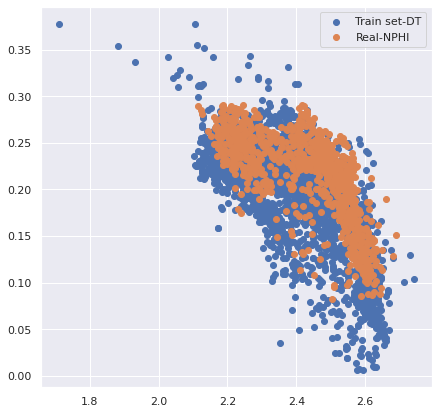

In [ ]:
fig = plt.figure(figsize = (7,7))
ax = plt.axes()

ax.scatter(x_ref_train[:,1], y_ref_train[:,0:987], label = "Train set-DT")
ax.scatter(x3_campos['RHOB'], y3_campos, label = "Real-NPHI")
ax.legend()

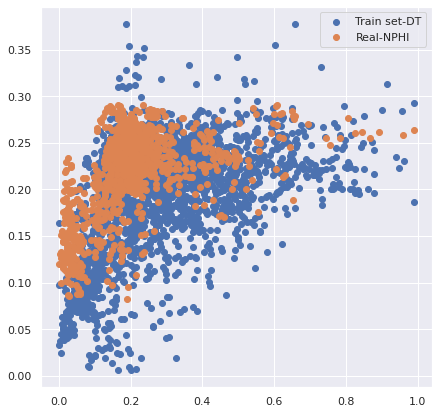

In [ ]:
fig = plt.figure(figsize = (7,7))
ax = plt.axes()

ax.scatter(x_ref_train[:,2], y_ref_train[:,0:987], label = "Train set-DT")
ax.scatter(x3_campos['VSH'], y3_campos, label = "Real-NPHI")
ax.legend()

In [ ]:
bayreg = BayesianRidge(n_iter=600,tol=1e-6,compute_score=True).fit(x_train_scaler,y_ref_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print('Bayesian Regressor: {}'.format(bayreg.score(x_test_scaler,y_ref_test)))
y_pred_test_bayreg = bayreg.predict(x_test_scaler).reshape(-1,1)


y_pred_blind_bayreg = bayreg.predict(x_blind_scaler).reshape(-1,1)


er_bayreg = (y_pred_blind_bayreg - y3_campos)/y3_campos

Bayesian Regressor: 0.7601468843975517


In [ ]:
y_pred_blind_bayreg.shape

(999, 1)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
#O erro absoluto médio para o Poço cego da regressão Bayesiana
e_mean_bayreg_blind = mean_absolute_error(y3_campos, y_pred_blind_bayreg) 
#raiz do erro quadrático médio para Poço cego da regressão Bayesiana
rmse_bayred_blind = mean_squared_error(y3_campos, y_pred_blind_bayreg, squared= False) #squaredbool, default=True if True returns MSE value, if False returns RMSE value.
#erro quadrático médio para o poço cego da regressão Bayesiana
mse_bayreg_blind = mean_squared_error(y3_campos, y_pred_blind_bayreg, squared= True)
#R quadrado para o poço cego da regressão Bayesiana
r2_bayreg_blind = r2_score(y3_campos, y_pred_blind_bayreg)
# mape
mape_bayreg_blind = mean_absolute_percentage_error(y3_campos, y_pred_blind_bayreg)

# erro absoluto médio para o Poço teste da regressão Gaussiana
e_mean_bayreg_teste = mean_absolute_error(y_ref_test, y_pred_test_bayreg) 
#A raiz do erro quadrático médio para o Poço teste da regressão Gaussiana
rmse_bayreg_teste = mean_squared_error(y_ref_test, y_pred_test_bayreg, squared= False) #squaredbool, default=True if True returns MSE value, if False returns RMSE value.
#erro quadrático médio para o para o Poço teste da regressão Gaussiana
mse_bayreg_teste = mean_squared_error(y_ref_test, y_pred_test_bayreg, squared= True)
#R quadrado para o Poço cego para o Poço teste da regressão Gaussiana
r2_bayreg_teste = r2_score(y_ref_test, y_pred_test_bayreg)
#mape
mape_bayreg_teste = mean_absolute_percentage_error(y_ref_test, y_pred_test_bayreg)

In [ ]:
lr = LinearRegression().fit(x_train_scaler, y_ref_train)
y_pred_test_linear = lr.predict(x_test_scaler).reshape(-1,1)

### Teste no poço Blind (Norne 5)
y_pred_blind_lr = lr.predict(x_blind_scaler).reshape(-1,1)

### Erro Relativo ###

er_lr = (y_pred_blind_lr - y3_campos)/y3_campos

In [ ]:
#O erro absoluto médio para o Poço cego da regressão Linear
e_mean_lr = mean_absolute_error(y3_campos, y_pred_blind_lr) 
#A raiz do erro quadrático médio para o Poço cego da regressão Linear é
rmse_lr = mean_squared_error(y3_campos, y_pred_blind_lr, squared= False) #squaredbool, default=True if True returns MSE value, if False returns RMSE value.
#O erro quadrático médio para o Poço cego da regressão Linear é
mse_lr = mean_squared_error(y3_campos, y_pred_blind_lr, squared= True)
#O R quadrado para o Poço teste da regressão Linear é
r2_lr = r2_score(y3_campos, y_pred_blind_lr)
# mape
mape_lr = mean_absolute_percentage_error(y3_campos, y_pred_blind_lr)

#O erro absoluto médio para o Poço teste da regressão Linear
e_mean_lr_teste = mean_absolute_error(y_ref_test, y_pred_test_linear) 
#A raiz do erro quadrático médio para o Poço teste da regressão Linear é
rmse_lr_teste = mean_squared_error(y_ref_test, y_pred_test_linear, squared= False) #squaredbool, default=True if True returns MSE value, if False returns RMSE value.
#O erro quadrático médio para o Poço teste da regressão Linear é
mse_lr_teste = mean_squared_error(y_ref_test, y_pred_test_linear, squared= True)
#O R quadrado para o Poço cego da regressão Linear é
r2_lr_teste = r2_score(y_ref_test, y_pred_test_linear)
# mape
mape_lr_teste = mean_absolute_percentage_error(y_ref_test, y_pred_test_linear)

In [ ]:
gaussian_process = GaussianRegressor(kernel=None, n_restarts_optimizer=0)
gpr= gaussian_process.fit(x_train_scaler, y_ref_train)
gpr.kernel_

1**2 * RBF(length_scale=1)

In [ ]:
y_pred_test_gpr = gpr.predict(x_test_scaler).reshape(-1,1)

### Teste no poço Blind (Norne 5)
y_pred_blind_gpr = gpr.predict(x_blind_scaler).reshape(-1,1)

### Erro Relativo ###

er_gpr = (y_pred_blind_gpr - y3_campos)/y3_campos

In [ ]:
#O erro absoluto médio para o Poço cego da regressão Gaussiana é
e_mean_gpr = mean_absolute_error(y3_campos, y_pred_blind_gpr) 
#A raiz do erro quadrático médio para o Poço cego da regressão Gaussiana é
rmse_gpr = mean_squared_error(y3_campos, y_pred_blind_gpr, squared= False) #squaredbool, default=True if True returns MSE value, if False returns RMSE value.
#O erro quadrático médio para o Poço cego da regressão Gaussiana é
mse_gpr = mean_squared_error(y3_campos, y_pred_blind_gpr, squared= True)
#O R quadrado para o Poço cego da regressão Gaussiana é
r2_gpr = r2_score(y3_campos, y_pred_blind_gpr)
# mape
mape_gpr = mean_absolute_percentage_error(y3_campos, y_pred_blind_gpr)

#O erro absoluto médio para o Poço teste da regressão Gaussiana é
e_mean_gpr_teste = mean_absolute_error(y_ref_test, y_pred_test_gpr) 
#A raiz do erro quadrático médio para o Poço teste da regressão Gaussiana é
rmse_gpr_teste = mean_squared_error(y_ref_test, y_pred_test_gpr, squared= False) #squaredbool, default=True if True returns MSE value, if False returns RMSE value.
#O erro quadrático médio para o Poço teste da regressão Gaussiana é
mse_gpr_teste = mean_squared_error(y_ref_test, y_pred_test_gpr, squared= True)
#O R quadrado para o Poço teste da regressão Gaussiana é
r2_gpr_teste = r2_score(y_ref_test, y_pred_test_gpr)
# mape
mape_gpr_teste = mean_absolute_percentage_error(y_ref_test, y_pred_test_gpr)

In [ ]:
!pip install plotly
import plotly.graph_objects as go

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
fig = go.Figure(data=[go.Table(header=dict(values=['Métricas','RL Poço cego','RL Poço teste','RB Poço cego','RB Poço teste','RG Poço cego','RG Poço teste'],
                                           line_color='darkslategray',
                                         align=['center','center'],
                                         font=dict(size=14)),
                cells=dict(values=[['MAE','RMSE','MSE','R2','MAPE'],
                           ["{:.5f}".format(e_mean_lr),"{:.5f}".format(rmse_lr),
                            "{:.5f}".format(mse_lr),"{:.5f}".format(r2_lr),"{:.5f}".format(mape_lr)],
                                   
                           ["{:.5f}".format(e_mean_lr_teste),"{:.5f}".format(rmse_lr_teste),
                            "{:.5f}".format(mse_lr_teste),"{:.5f}".format(r2_lr_teste),"{:.5f}".format(mape_lr_teste)],
                           
                           ["{:.5f}".format(e_mean_bayreg_blind),"{:.5f}".format(rmse_bayred_blind),
                            "{:.5f}".format(mse_bayreg_blind),"{:.5f}".format(r2_bayreg_blind),"{:.5f}".format(mape_bayreg_blind)],
                           
                           ["{:.5f}".format(e_mean_bayreg_teste),"{:.5f}".format(rmse_bayreg_teste),
                            "{:.5f}".format(mse_bayreg_teste),"{:.5f}".format(r2_bayreg_teste),"{:.5f}".format(mape_bayreg_teste)],
                           
                           ["{:.5f}".format(e_mean_gpr),"{:.5f}".format(rmse_gpr),"{:.5f}".format(mse_gpr),
                            "{:.5f}".format(r2_gpr),"{:.5f}".format(mape_gpr)],
                           
                           ["{:.5f}".format(e_mean_gpr_teste),"{:.5f}".format(rmse_gpr_teste),
                            "{:.5f}".format(mse_gpr_teste),"{:.5f}".format(r2_gpr_teste),"{:.5f}".format(mape_gpr_teste)]
                           ],
                           line_color='darkslategray',
                           )
                ),
                ])
fig.show()

In [ ]:
depth3 = df_campos3['DEPTH']

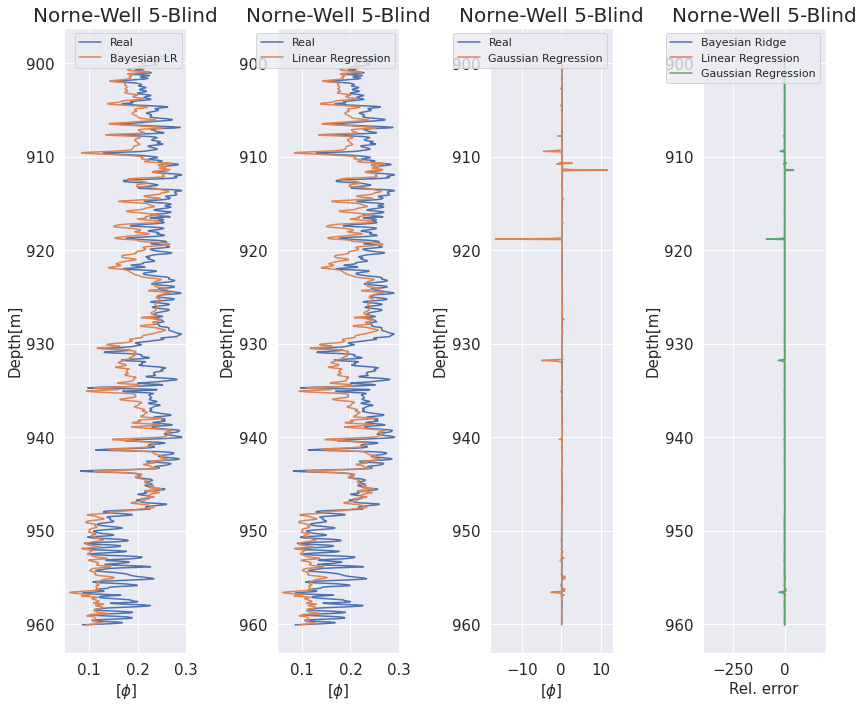

In [ ]:
f = plt.figure(figsize=(12,10))
ax1 = f.add_subplot(141)
ax1.plot(y3_campos, depth3, label='Real')
ax1.plot(y_pred_blind_bayreg[0:2071], depth3, label='Bayesian LR')
plt.legend(loc='best')
plt.tick_params(axis='x', labelsize=15)
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.title('Norne-Well 5-Blind', size=20)
plt.xlabel('[$\phi$]', size=15)
plt.tick_params(axis='y', labelsize=15)

ax2 = f.add_subplot(142)
ax2.plot(y3_campos, depth3, label='Real')
ax2.plot(y_pred_blind_lr[0:2071], depth3, label='Linear Regression')
plt.legend(loc='best')
plt.tick_params(axis='x', labelsize=15)
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.title('Norne-Well 5-Blind', size=20)
plt.xlabel('[$\phi$]', size=15)
plt.tick_params(axis='y', labelsize=15)

ax3 = f.add_subplot(143)
ax3.plot(y3_campos, depth3, label='Real')
ax3.plot(y_pred_blind_gpr[0:2071], depth3, label='Gaussian Regression')
plt.legend(loc='best')
#plt.xlim(-.2,.5)
plt.tick_params(axis='x', labelsize=15)
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.title('Norne-Well 5-Blind', size=20)
plt.xlabel('[$\phi$]', size=15)
plt.tick_params(axis='y', labelsize=15)

ax4 = f.add_subplot(144)
ax4.plot(er_bayreg, depth3, label='Bayesian Ridge')
ax4.plot(er_lr, depth3, label='Linear Regression')
ax4.plot(er_gpr[0:2071], depth3, label='Gaussian Regression' )
plt.legend(loc='best')
plt.xlim(-400,200)
plt.tick_params(axis='x', labelsize=15)
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.title('Norne-Well 5-Blind', size=20)
plt.xlabel('Rel. error', size=15)
plt.tick_params(axis='y', labelsize=15)

f.tight_layout()
plt.show()

## **Gaussiana Hiperparametrizada**

In [ ]:
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import GridSearchCV
import time

In [ ]:

start = time.time()
param_grid = [{
    "alpha":  [1e2, 1e3,1e4,1e5,1e6,1e7,1e-2, 1e-3,1e-4,1e-5,1e-6,1e-7],
    "kernel": [RBF(length_scale) for length_scale in (1e-4,1e-3,1e-2,1e-1,1,10,1e2,1e3,1e-4)],
    "kernel": [RBF(length_scale_bounds) for length_scale_bounds in (1e-05, 100000.0)],
    "kernel": [RBF(l) for l in np.logspace(-1, 1, 2)]
}]#, {
#    "alpha":  [1e-2, 1e-3],
#    "kernel": [ExpSineSquared(l) for l in np.logspace(-1, 1, 2)]
#}]
# scores for regression
scores = ['explained_variance', 'r2']

gpr1 = GaussianProcessRegressor()
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(estimator=gpr1,param_grid=param_grid,n_jobs = -1, cv=4, verbose=3,
                       scoring='%s' % score) #n_jobs ->processamento de forma paralela # score -> métrica r
    gpr=clf.fit(x_train_scaler, y_ref_train)
    print(clf.best_params_)
end = time.time()
print(end - start)

# Tuning hyper-parameters for explained_variance

Fitting 4 folds for each of 24 candidates, totalling 96 fits
{'alpha': 0.01, 'kernel': RBF(length_scale=0.1)}
# Tuning hyper-parameters for r2

Fitting 4 folds for each of 24 candidates, totalling 96 fits
{'alpha': 0.01, 'kernel': RBF(length_scale=0.1)}
217.08420085906982


In [ ]:
kernel_rbf = RBF(length_scale = 0.1)
gaussian_regression_rbf = GaussianProcessRegressor(kernel = kernel_rbf,alpha = 0.01, n_restarts_optimizer = 0)
gpr_kernel_rbf = gaussian_regression_rbf.fit(x_train_scaler, y_ref_train)

In [ ]:
y_pred_test_gpr_kernelRbf = gpr_kernel_rbf.predict(x_test_scaler).reshape(-1,1)

### Teste no poço Blind (Norne 5)
y_pred_blind_gpr_kernelRbf = gpr_kernel_rbf.predict(x_blind_scaler).reshape(-1,1)

### Erro Relativo ###

er_gpr_kernelRbf = (y_pred_blind_gpr_kernelRbf - y3_campos)/y3_campos

In [ ]:
#O erro absoluto médio para o Poço cego da regressão Gaussiana é
e_mean_gpr_kernelRbf = mean_absolute_error(y3_campos, y_pred_blind_gpr_kernelRbf) 
#A raiz do erro quadrático médio para o Poço cegoy3_campos da regressão Gaussiana é
rmse_gpr_kernelRbf = mean_squared_error(y3_campos, y_pred_blind_gpr_kernelRbf, squared= False) #squaredbool, default=True if True returns MSE value, if False returns RMSE value.
#O erro quadrático médio para o Poço cego da regressão Gaussiana é
mse_gpr_kernelRbf = mean_squared_error(y3_campos, y_pred_blind_gpr_kernelRbf, squared= True)
#O R quadrado para o Poço cego da regressão Gaussiana é
r2_gpr_kernelRbf = r2_score(y3_campos, y_pred_blind_gpr_kernelRbf)
# mape
mape_gpr_kernelRbf = mean_absolute_percentage_error(y3_campos, y_pred_blind_gpr_kernelRbf)

#O erro absoluto médio para o Poço teste da regressão Gaussiana é
e_mean_gpr_teste_kernelRbf = mean_absolute_error(y_ref_test, y_pred_test_gpr_kernelRbf) 
#A raiz do erro quadrático médio para o Poço teste da regressão Gaussiana é
rmse_gpr_teste_kernelRbf = mean_squared_error(y_ref_test, y_pred_test_gpr_kernelRbf, squared= False) #squaredbool, default=True if True returns MSE value, if False returns RMSE value.
#O erro quadrático médio para o Poço teste da regressão Gaussiana é
mse_gpr_teste_kernelRbf = mean_squared_error(y_ref_test, y_pred_test_gpr_kernelRbf, squared= True)
#O R quadrado para o Poço teste da regressão Gaussiana é
r2_gpr_teste_kernelRbf = r2_score(y_ref_test, y_pred_test_gpr_kernelRbf)
#mape
mape_gpr_teste_kernelRbf = mean_absolute_percentage_error(y_ref_test, y_pred_test_gpr_kernelRbf)

In [ ]:
fig = go.Figure(data=[go.Table(header=dict(values=['Métricas',
                                                   'RL Poço cego','RL Poço teste','RB Poço cego',
                                                   'RB Poço teste','RG Poço cego S/ kernel','RG Poço teste S/ kernel',
                                                   'RG Poço cego C/ kernel', 'RG Poço teste C/ kernel'],
                                           line_color='darkslategray',
                                         align=['center','center'],
                                         font=dict(size=14)),
                cells=dict(values=[['MAE','RMSE','MSE','R2','MAPE'],
                           ["{:.5f}".format(e_mean_lr),"{:.5f}".format(rmse_lr),
                            "{:.5f}".format(mse_lr),"{:.5f}".format(r2_lr),'{:.5f}'.format(mape_lr)],
                                   
                           ["{:.5f}".format(e_mean_lr_teste),"{:.5f}".format(rmse_lr_teste),
                            "{:.5f}".format(mse_lr_teste),"{:.5f}".format(r2_lr_teste),'{:.5f}'.format(mape_lr_teste)],
                                   
                           ["{:.5f}".format(e_mean_bayreg_blind),"{:.5f}".format(rmse_bayred_blind),
                            "{:.5f}".format(mse_bayreg_blind),"{:.5f}".format(r2_bayreg_blind),'{:.5f}'.format(mape_bayreg_blind)],
                                   
                           ["{:.5f}".format(e_mean_bayreg_teste),"{:.5f}".format(rmse_bayreg_teste),
                            "{:.5f}".format(mse_bayreg_teste),"{:.5f}".format(r2_bayreg_teste),'{:.5f}'.format(mape_bayreg_teste)],
                                   
                           ["{:.5f}".format(e_mean_gpr),"{:.5f}".format(rmse_gpr),
                            "{:.5f}".format(mse_gpr),"{:.5f}".format(r2_gpr),'{:.5f}'.format(mape_gpr)],
                                   
                           ["{:.5f}".format(e_mean_gpr_teste),"{:.5f}".format(rmse_gpr_teste),
                            "{:.5f}".format(mse_gpr_teste),"{:.5f}".format(r2_gpr_teste),'{:.5f}'.format(mape_gpr_teste)],
                                   
                           ["{:.5f}".format(e_mean_gpr_kernelRbf),"{:.5f}".format(rmse_gpr_kernelRbf),
                            '{:.5f}'.format(mse_gpr_kernelRbf),'{:.5f}'.format(r2_gpr_kernelRbf),'{:.5f}'.format(mape_gpr_kernelRbf)],
                                   
                           ["{:.5f}".format(e_mean_gpr_teste_kernelRbf),'{:.5f}'.format(rmse_gpr_teste_kernelRbf),
                            '{:.5f}'.format(mse_gpr_teste_kernelRbf),'{:.5f}'.format(r2_gpr_teste_kernelRbf),
                            '{:.5f}'.format(mape_gpr_teste_kernelRbf)]
                                ],
                           line_color='darkslategray',
                           )
                ),
                ])
fig.show()

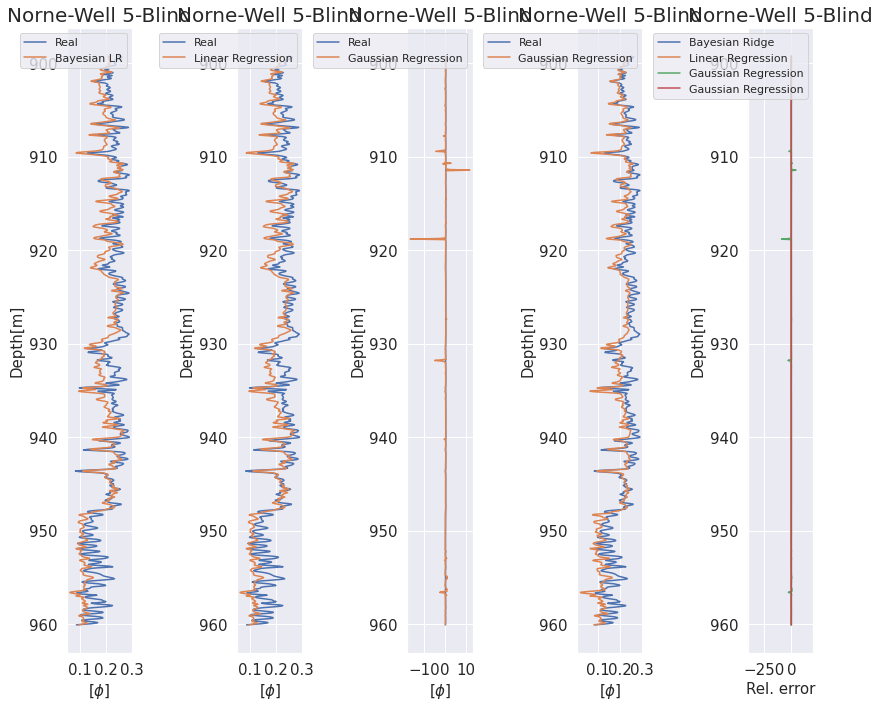

In [ ]:
f = plt.figure(figsize=(12,10))
ax1 = f.add_subplot(151)
ax1.plot(y3_campos, depth3, label='Real')
ax1.plot(y_pred_blind_bayreg[0:2071], depth3, label='Bayesian LR')
plt.legend(loc='best')
plt.tick_params(axis='x', labelsize=15)
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.title('Norne-Well 5-Blind', size=20)
plt.xlabel('[$\phi$]', size=15)
plt.tick_params(axis='y', labelsize=15)

ax2 = f.add_subplot(152)
ax2.plot(y3_campos, depth3, label='Real')
ax2.plot(y_pred_blind_lr[0:2071], depth3, label='Linear Regression')
plt.legend(loc='best')
plt.tick_params(axis='x', labelsize=15)
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.title('Norne-Well 5-Blind', size=20)
plt.xlabel('[$\phi$]', size=15)
plt.tick_params(axis='y', labelsize=15)

ax3 = f.add_subplot(153)
ax3.plot(y3_campos, depth3, label='Real')
ax3.plot(y_pred_blind_gpr[0:2071], depth3, label='Gaussian Regression')
plt.legend(loc='best')
#plt.xlim(-.2,.5)
plt.tick_params(axis='x', labelsize=15)
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.title('Norne-Well 5-Blind', size=20)
plt.xlabel('[$\phi$]', size=15)
plt.tick_params(axis='y', labelsize=15)

ax4 = f.add_subplot(154)
ax4.plot(y3_campos, depth3, label='Real')
ax4.plot(y_pred_blind_gpr_kernelRbf[0:2071], depth3, label='Gaussian Regression')
plt.legend(loc='best')
#plt.xlim(-.2,.5)
plt.tick_params(axis='x', labelsize=15)
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.title('Norne-Well 5-Blind', size=20)
plt.xlabel('[$\phi$]', size=15)
plt.tick_params(axis='y', labelsize=15)

ax5 = f.add_subplot(155)
ax5.plot(er_bayreg, depth3, label='Bayesian Ridge')
ax5.plot(er_lr, depth3, label='Linear Regression')
ax5.plot(er_gpr[0:2071], depth3, label='Gaussian Regression' )
ax5.plot(er_gpr_kernelRbf[0:2071], depth3, label='Gaussian Regression' )
plt.legend(loc='best')
plt.xlim(-400,200)
plt.tick_params(axis='x', labelsize=15)
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.title('Norne-Well 5-Blind', size=20)
plt.xlabel('Rel. error', size=15)
plt.tick_params(axis='y', labelsize=15)

f.tight_layout()
plt.show()

In [ ]:
param_grid = [{
    "alpha":  [1e-2,1e-3,1e-4,1e-5,1e-6,1e-7],
    #'length_scale': [1000,100,10,0.1,0.01,0.001,0.0001,0.00001,0.000001],
    "kernel": [RationalQuadratic(l) for l in np.logspace(-1, 1, 2)],
    "kernel": [RationalQuadratic(length_scale) for length_scale in (1000,100,10,0.1,0.01,0.001,0.0001,0.00001,0.000001)]
              }]
# scores for regression
scores = ['explained_variance', 'r2']

gpr1 = GaussianProcessRegressor()
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(estimator=gpr1, param_grid=param_grid, cv=4, verbose=3,n_jobs=-1,
                       scoring='%s' % score) #n_jobs ->processamento de forma paralela # score -> métrica r
    gpr=clf.fit(x_train_scaler, y_ref_train)
    print(clf.best_params_)

# Tuning hyper-parameters for explained_variance

Fitting 4 folds for each of 54 candidates, totalling 216 fits


KeyboardInterrupt: ignored

In [ ]:
kernel_rational = RationalQuadratic(alpha=1,length_scale=0.01)
gaussian_process_rational = GaussianProcessRegressor(kernel=kernel_rational,alpha=1e-07, n_restarts_optimizer=0)
gpr_kernel_rational= gaussian_process_rational.fit(x_train_scaler, y_ref_train)

In [ ]:
y_pred_test_gpr_kernelRational = gpr_kernel_rational.predict(x_test_scaler).reshape(-1,1)

### Teste no poço Blind (Norne 5)
y_pred_blind_gpr_kernelRational = gpr_kernel_rational.predict(x_blind_scaler).reshape(-1,1)

### Erro Relativo ###

er_gpr_kernelRational = (y_pred_blind_gpr_kernelRational - y3_campos)/y3_campos

In [ ]:
#O erro absoluto médio para o Poço cego da regressão Gaussiana é
e_mean_gpr_kernelRational = mean_absolute_error(y3_campos, y_pred_blind_gpr_kernelRational) 
#A raiz do erro quadrático médio para o Poço cego da regressão Gaussiana é
rmse_gpr_kernelRational = mean_squared_error(y3_campos, y_pred_blind_gpr_kernelRational, squared= False) #squaredbool, default=True if True returns MSE value, if False returns RMSE value.
#O erro quadrático médio para o Poço cego da regressão Gaussiana é
mse_gpr_kernelRational = mean_squared_error(y3_campos, y_pred_blind_gpr_kernelRational, squared= True)
#O R quadrado para o Poço cego da regressão Gaussiana é
r2_gpr_kernelRational = r2_score(y3_campos, y_pred_blind_gpr_kernelRational)
#mape
mape_gpr_kernelRational = mean_absolute_percentage_error(y3_campos, y_pred_blind_gpr_kernelRational)

#O erro absoluto médio para o Poço teste da regressão Gaussiana é
e_mean_gpr_teste_kernelRational = mean_absolute_error(y_ref_test, y_pred_test_gpr_kernelRational) 
#A raiz do erro quadrático médio para o Poço teste da regressão Gaussiana é
rmse_gpr_teste_kernelRational = mean_squared_error(y_ref_test, y_pred_test_gpr_kernelRational, squared= False) #squaredbool, default=True if True returns MSE value, if False returns RMSE value.
#O erro quadrático médio para o Poço teste da regressão Gaussiana é
mse_gpr_teste_kernelRational = mean_squared_error(y_ref_test, y_pred_test_gpr_kernelRational, squared= True)
#O R quadrado para o Poço teste da regressão Gaussiana é
r2_gpr_teste_kernelRational = r2_score(y_ref_test, y_pred_test_gpr_kernelRational)
mape_gpr_teste_kernelRational = mean_absolute_percentage_error(y_ref_test, y_pred_test_gpr_kernelRational)

In [ ]:
fig = go.Figure(data=[go.Table(header=dict(values=['Métricas',
                                                   'RL Poço cego','RL Poço teste','RB Poço cego',
                                                   'RB Poço teste','RG Poço cego S/ kernel','RG Poço teste S/ kernel',
                                                   'RG Poço cego kernel-rbf', 'RG Poço teste kernel-rbf',
                                                   'Rg Poço cego k-Rational','RG Poço teste k-Rational'
                                                  ],
                                           line_color='darkslategray',
                                         align=['center','center'],
                                         font=dict(size=14)),
                cells=dict(values=[['MAE','RMSE','MSE','R2','MAPE'],
                           ["{:.5f}".format(e_mean_lr),"{:.5f}".format(rmse_lr),
                            "{:.5f}".format(mse_lr),"{:.5f}".format(r2_lr),"{:.5f}".format(mape_lr)],
                                   
                           ["{:.5f}".format(e_mean_lr_teste),"{:.5f}".format(rmse_lr_teste),
                            "{:.5f}".format(mse_lr_teste),"{:.5f}".format(r2_lr_teste),"{:.5f}".format(mape_lr_teste)],
                                   
                           ["{:.5f}".format(e_mean_bayreg_blind),"{:.5f}".format(rmse_bayred_blind),
                            "{:.5f}".format(mse_bayreg_blind),"{:.5f}".format(r2_bayreg_blind),
                            "{:.5f}".format(mape_bayreg_blind)],
                                   
                           ["{:.5f}".format(e_mean_bayreg_teste),"{:.5f}".format(rmse_bayreg_teste),
                            "{:.5f}".format(mse_bayreg_teste),"{:.5f}".format(r2_bayreg_teste),
                            "{:.5f}".format(mape_bayreg_teste)],
                                   
                           ["{:.5f}".format(e_mean_gpr),"{:.5f}".format(rmse_gpr),"{:.5f}".format(mse_gpr),
                            "{:.5f}".format(r2_gpr),"{:.5f}".format(mape_gpr)],
                                   
                           ["{:.5f}".format(e_mean_gpr_teste),"{:.5f}".format(rmse_gpr_teste),
                            "{:.5f}".format(mse_gpr_teste),"{:.5f}".format(r2_gpr_teste),
                            "{:.5f}".format(mape_gpr_teste)],
                                   
                           ["{:.5f}".format(e_mean_gpr_kernelRbf),"{:.5f}".format(rmse_gpr_kernelRbf),
                            '{:.5f}'.format(mse_gpr_kernelRbf),'{:.5f}'.format(r2_gpr_kernelRbf),
                            "{:.5f}".format(mape_gpr_kernelRbf)],
                           ["{:.5f}".format(e_mean_gpr_teste_kernelRbf),'{:.5f}'.format(rmse_gpr_teste_kernelRbf),
                            '{:.5f}'.format(mse_gpr_teste_kernelRbf),'{:.5f}'.format(r2_gpr_teste_kernelRbf),
                            "{:.5f}".format(mape_gpr_teste_kernelRbf)],
                                   
                           ["{:.5f}".format(e_mean_gpr_kernelRational),"{:.5f}".format(rmse_gpr_kernelRational),
                            '{:.5f}'.format(mse_gpr_kernelRational),'{:.5f}'.format(r2_gpr_kernelRational),
                            "{:.5f}".format(mape_gpr_kernelRational)],
                                   
                           ["{:.5f}".format(e_mean_gpr_teste_kernelRational),'{:.5f}'.format(rmse_gpr_teste_kernelRational),
                            '{:.5f}'.format(mse_gpr_teste_kernelRational),'{:.5f}'.format(r2_gpr_teste_kernelRational),
                            "{:.5f}".format(mape_gpr_teste_kernelRational)]     
                                  ],
                           line_color='darkslategray',
                           )
                ),
                ])
fig.show()
f.savefig("metricas.eps", bbox_inches='tight', dpi=600)
#beingsaved.savefig('metricas.eps', format='eps', dpi=1000)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

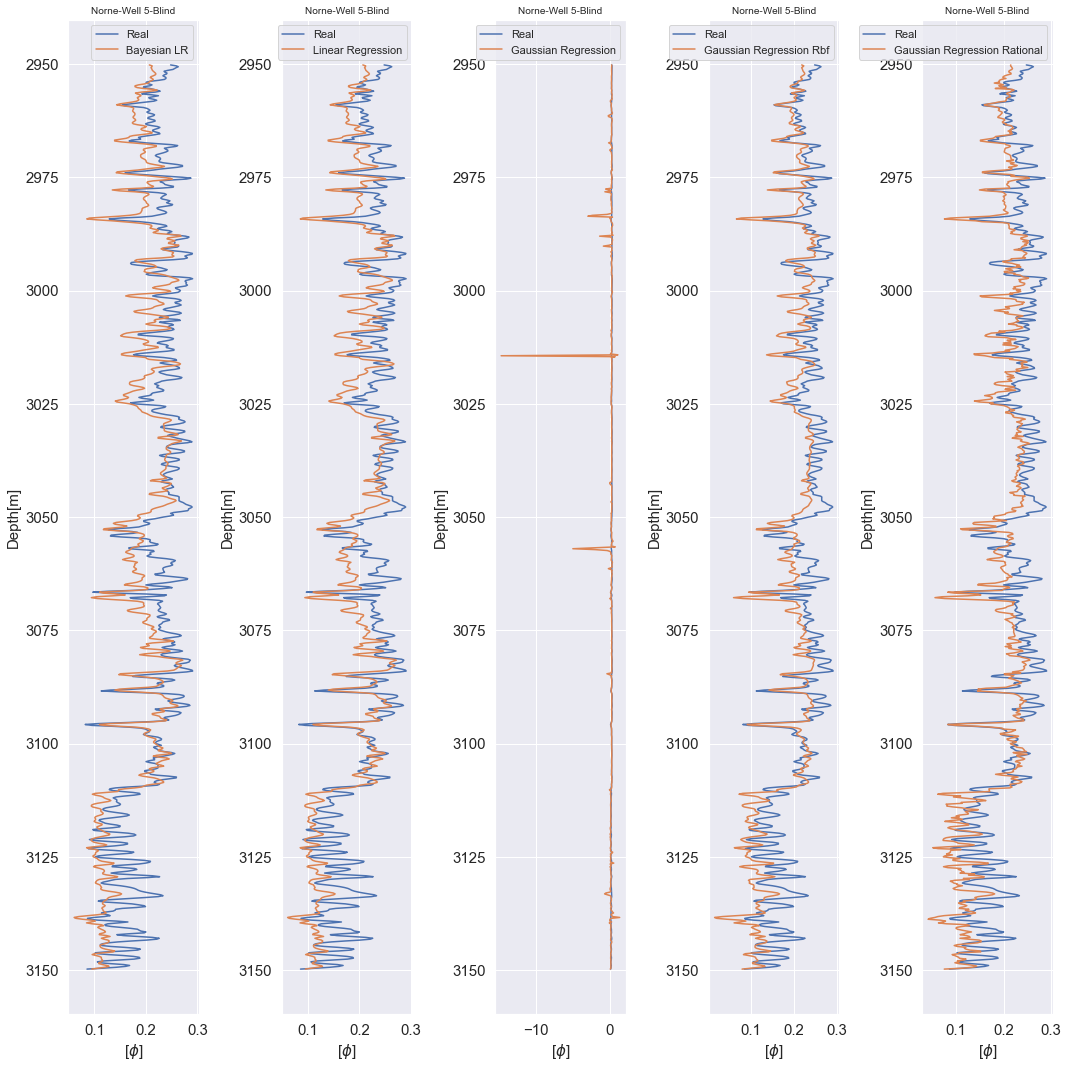

In [ ]:
f = plt.figure(figsize=(15,15))
ax1 = f.add_subplot(151)
ax1.plot(y3_campos, depth3, label='Real')
ax1.plot(y_pred_blind_bayreg[0:2071], depth3, label='Bayesian LR')
plt.legend(loc='best')
plt.tick_params(axis='x', labelsize=15)
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.title('Norne-Well 5-Blind', size=10)
plt.xlabel('[$\phi$]', size=15)
plt.tick_params(axis='y', labelsize=15)

ax2 = f.add_subplot(152)
ax2.plot(y3_campos, depth3, label='Real')
ax2.plot(y_pred_blind_lr[0:2071], depth3, label='Linear Regression')
plt.legend(loc='best')
plt.tick_params(axis='x', labelsize=15)
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.title('Norne-Well 5-Blind', size=10)
plt.xlabel('[$\phi$]', size=15)
plt.tick_params(axis='y', labelsize=15)

ax3 = f.add_subplot(153)
ax3.plot(y3_campos, depth3, label='Real')
ax3.plot(y_pred_blind_gpr[0:2071], depth3, label='Gaussian Regression')
plt.legend(loc='best')
#plt.xlim(-.2,.5)
plt.tick_params(axis='x', labelsize=15)
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.title('Norne-Well 5-Blind', size=10)
plt.xlabel('[$\phi$]', size=15)
plt.tick_params(axis='y', labelsize=15)

ax4 = f.add_subplot(154)
ax4.plot(y3_campos, depth3, label='Real')
ax4.plot(y_pred_blind_gpr_kernelRbf[0:2071], depth3, label='Gaussian Regression Rbf')
plt.legend(loc='best')
#plt.xlim(-.2,.5)
plt.tick_params(axis='x', labelsize=15)
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.title('Norne-Well 5-Blind', size=10)
plt.xlabel('[$\phi$]', size=15)
plt.tick_params(axis='y', labelsize=15)

ax5 = f.add_subplot(155)
ax5.plot(y3_campos, depth3, label='Real')
ax5.plot(y_pred_blind_gpr_kernelRational[0:2071], depth3, label='Gaussian Regression Rational')
plt.legend(loc='best')
#plt.xlim(-.2,.5)
plt.tick_params(axis='x', labelsize=15)
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.title('Norne-Well 5-Blind', size=10)
plt.xlabel('[$\phi$]', size=15)
plt.tick_params(axis='y', labelsize=15)


#ax6 = f.add_subplot(166)
#ax6.plot(er_bayreg, depth3, label='Bayesian Ridge')
#ax6.plot(er_lr, depth3, label='Linear Regression')
#ax6.plot(er_gpr[0:2071], depth3, label='Gaussian Regression' )
#ax5.plot(er_gpr_kernelRbf[0:2071], depth3, label='Gaussian Regression' )
#plt.legend(loc='best')
#plt.xlim(-400,200)
#plt.tick_params(axis='x', labelsize=15)
#plt.gca().invert_yaxis()
#plt.ylabel('Depth[m]', size=15)
#plt.title('Norne-Well 5-Blind', size=10)
#plt.xlabel('Rel. error', size=15)
#plt.tick_params(axis='y', labelsize=15)

f.tight_layout()
plt.show()

In [ ]:
# Regressão baysiana com hiperparametros
from sklearn.linear_model import BayesianRidge

import time

start = time.time()
param_grid = [{
    "n_iter": [400],
    "tol":  [1e5,1e4,1e3,1e2,1e1,1e-1, 1e-2, 1e-3, 1e-4, 1e-5,1e-6, 1e-7, 1e-8, 1e-9, 1e-10],
    "alpha_1":  [1e5,1e4,1e3,1e2,1e1,1e-1,1e-2,1e-3,1e-4,1e-5,1e-6, 1e-7, 1e-8, 1e-9, 1e-10],
    "alpha_2":  [1e5,1e4,1e3,1e2,1e1,1e-1,1e-2,1e-3,1e-4,1e-5,1e-6, 1e-7, 1e-8, 1e-9, 1e-10],
    "lambda_1":  [1e5,1e4,1e3,1e2,1e1,1e-1,1e-2, 1e-3, 1e-4,1e-5,1e-6, 1e-7, 1e-8, 1e-9, 1e-10],
    "lambda_2":  [1e5,1e4,1e3,1e2,1e1,1e-1,1e-2, 1e-3, 1e-4,1e-5,1e-6, 1e-7, 1e-8, 1e-9, 1e-10],
    "alpha_init":  [None],
    "lambda_init":  [None],
    "compute_score":[None],
    "fit_intercept":[True],
    "normalize":['deprecated'],
    "copy_X": [True],
    #"Verbose": [False],
}]
    #, {
#    "alpha":  [1e-2, 1e-6],
#    "kernel": [DotProduct(sigma_0) for sigma_0 in np.logspace(-1, 1, 2)]

# scores for regression
scores = ['explained_variance', 'r2']

baye1= BayesianRidge()

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(estimator=baye1, param_grid=param_grid, cv=4, verbose=3,n_jobs=-1,
                       scoring='%s' % score ) #n_jobs ->processamento de forma paralela # score -> métrica r
    bay=clf.fit(x_train_scaler, y_ref_train)
    print(clf.best_params_)

end = time.time()

print(end - start)

# Tuning hyper-parameters for explained_variance

Fitting 4 folds for each of 759375 candidates, totalling 3037500 fits


C:\Users\CometLake_05\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



{'alpha_1': 1e-10, 'alpha_2': 0.1, 'alpha_init': None, 'compute_score': None, 'copy_X': True, 'fit_intercept': True, 'lambda_1': 100000.0, 'lambda_2': 10.0, 'lambda_init': None, 'n_iter': 400, 'normalize': 'deprecated', 'tol': 1e-08}
# Tuning hyper-parameters for r2

Fitting 4 folds for each of 759375 candidates, totalling 3037500 fits


C:\Users\CometLake_05\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



{'alpha_1': 1e-10, 'alpha_2': 10000.0, 'alpha_init': None, 'compute_score': None, 'copy_X': True, 'fit_intercept': True, 'lambda_1': 0.1, 'lambda_2': 0.1, 'lambda_init': None, 'n_iter': 400, 'normalize': 'deprecated', 'tol': 0.001}
1847.8567667007446


In [ ]:
bayreg_with_parameters = BayesianRidge(alpha_1= 1e-10, alpha_2= 10000.0, 
                                       alpha_init= None, compute_score= None, 
                                       copy_X= True, fit_intercept= True, 
                                       lambda_1= 0.1, lambda_2= 0.1, 
                                       lambda_init= None, n_iter= 400, 
                                       normalize= 'deprecated', tol= 0.001).fit(x_train_scaler,y_ref_train)

C:\Users\CometLake_05\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
print('Bayesian Regressor: {}'.format(bayreg_with_parameters.score(x_test_scaler,y_ref_test)))
y_pred_test_bayreg_parameters = bayreg_with_parameters.predict(x_test_scaler).reshape(-1,1)


y_pred_blind_bayreg_parameters = bayreg_with_parameters.predict(x_blind_scaler).reshape(-1,1)


er_bayreg_parameters = (y_pred_blind_bayreg_parameters - y3_campos)/y3_campos

Bayesian Regressor: 0.7673831542245199


In [ ]:
#O erro absoluto médio para o Poço cego da regressão Bayesiana
e_mean_bayreg_blind_parameters = mean_absolute_error(y3_campos,y_pred_blind_bayreg_parameters) 
#raiz do erro quadrático médio para Poço cego da regressão Bayesiana
rmse_bayred_blind_parameters = mean_squared_error(y3_campos, y_pred_blind_bayreg_parameters, squared= False) #squaredbool, default=True if True returns MSE value, if False returns RMSE value.
#erro quadrático médio para o poço cego da regressão Bayesiana
mse_bayreg_blind_parameters = mean_squared_error(y3_campos, y_pred_blind_bayreg_parameters, squared= True)
#R quadrado para o poço cego da regressão Bayesiana
r2_bayreg_blind_parameters = r2_score(y3_campos, y_pred_blind_bayreg_parameters)
# mape
mape_bayreg_blind_parameters = mean_absolute_percentage_error(y3_campos, y_pred_blind_bayreg_parameters)

# erro absoluto médio para o Poço teste da regressão Gaussiana
e_mean_bayreg_teste_parameters = mean_absolute_error(y_ref_test,y_pred_test_bayreg_parameters) 
#A raiz do erro quadrático médio para o Poço teste da regressão Gaussiana
rmse_bayreg_teste_parameters = mean_squared_error(y_ref_test, y_pred_test_bayreg_parameters, squared= False) #squaredbool, default=True if True returns MSE value, if False returns RMSE value.
#erro quadrático médio para o para o Poço teste da regressão Gaussiana
mse_bayreg_teste_parameters = mean_squared_error(y_ref_test, y_pred_test_bayreg_parameters, squared= True)
#R quadrado para o Poço cego para o Poço teste da regressão Gaussiana
r2_bayreg_teste_parameters = r2_score(y_ref_test, y_pred_test_bayreg)
#mape
mape_bayreg_teste_parameters = mean_absolute_percentage_error(y_ref_test, y_pred_test_bayreg_parameters)

In [ ]:
fig = go.Figure(data=[go.Table(header=dict(values=['Métricas',
                                                   'RL Poço cego','RL Poço teste','RB Poço cego',
                                                   'RB Poço teste','RB Poço cego c H','RB Poço teste -H',
                                                   'RG Poço cego S/ kernel',
                                                   'RG Poço teste S/ kernel',
                                                   'RG Poço cego k-rbf', 'RG Poço teste k-rbf',
                                                   'Rg Poço cego k-Rational','RG Poço teste k-Rational'
                                                  ],
                                           line_color='darkslategray',
                                         align=['center','center'],
                                         font=dict(size=14)),
                cells=dict(values=[['MAE','RMSE','MSE','R2','MAPE'],
                           ["{:.5f}".format(e_mean_lr),"{:.5f}".format(rmse_lr),
                            "{:.5f}".format(mse_lr),"{:.5f}".format(r2_lr),"{:.5f}".format(mape_lr)],
                                   
                           ["{:.5f}".format(e_mean_lr_teste),"{:.5f}".format(rmse_lr_teste),
                            "{:.5f}".format(mse_lr_teste),"{:.5f}".format(r2_lr_teste),"{:.5f}".format(mape_lr_teste)],
                                   
                           ["{:.5f}".format(e_mean_bayreg_blind),"{:.5f}".format(rmse_bayred_blind),
                            "{:.5f}".format(mse_bayreg_blind),"{:.5f}".format(r2_bayreg_blind),
                            "{:.5f}".format(mape_bayreg_blind)],
                                   
                           ["{:.5f}".format(e_mean_bayreg_teste),"{:.5f}".format(rmse_bayreg_teste),
                            "{:.5f}".format(mse_bayreg_teste),"{:.5f}".format(r2_bayreg_teste),
                            "{:.5f}".format(mape_bayreg_teste)],
                                   
                           ["{:.5f}".format(e_mean_bayreg_blind_parameters),"{:.5f}".format(rmse_bayred_blind_parameters),
                            "{:.5f}".format(mse_bayreg_blind_parameters),"{:.5f}".format(r2_bayreg_blind_parameters),
                            "{:.5f}".format(mape_bayreg_blind_parameters)],
                           
                           ["{:.5f}".format(e_mean_bayreg_teste_parameters),"{:.5f}".format(rmse_bayreg_teste_parameters),
                            "{:.5f}".format(mse_bayreg_teste_parameters),"{:.5f}".format(r2_bayreg_teste_parameters),
                            "{:.5f}".format(mape_bayreg_teste_parameters)],        
                                   
                           ["{:.5f}".format(e_mean_gpr),"{:.5f}".format(rmse_gpr),"{:.5f}".format(mse_gpr),
                            "{:.5f}".format(r2_gpr),"{:.5f}".format(mape_gpr)],
                                   
                           ["{:.5f}".format(e_mean_gpr_teste),"{:.5f}".format(rmse_gpr_teste),
                            "{:.5f}".format(mse_gpr_teste),"{:.5f}".format(r2_gpr_teste),
                            "{:.5f}".format(mape_gpr_teste)],
                                   
                           ["{:.5f}".format(e_mean_gpr_kernelRbf),"{:.5f}".format(rmse_gpr_kernelRbf),
                            '{:.5f}'.format(mse_gpr_kernelRbf),'{:.5f}'.format(r2_gpr_kernelRbf),
                            "{:.5f}".format(mape_gpr_kernelRbf)],
                                   
                           ["{:.5f}".format(e_mean_gpr_teste_kernelRbf),'{:.5f}'.format(rmse_gpr_teste_kernelRbf),
                            '{:.5f}'.format(mse_gpr_teste_kernelRbf),'{:.5f}'.format(r2_gpr_teste_kernelRbf),
                            "{:.5f}".format(mape_gpr_teste_kernelRbf)],
                                   
                           ["{:.5f}".format(e_mean_gpr_kernelRational),"{:.5f}".format(rmse_gpr_kernelRational),
                            '{:.5f}'.format(mse_gpr_kernelRational),'{:.5f}'.format(r2_gpr_kernelRational),
                            "{:.5f}".format(mape_gpr_kernelRational)],
                                   
                           ["{:.5f}".format(e_mean_gpr_teste_kernelRational),'{:.5f}'.format(rmse_gpr_teste_kernelRational),
                            '{:.5f}'.format(mse_gpr_teste_kernelRational),'{:.5f}'.format(r2_gpr_teste_kernelRational),
                            "{:.5f}".format(mape_gpr_teste_kernelRational)]     
                                  ],
                           line_color='darkslategray',
                           )
                ),
                ])
fig.show()

## **Bayesiana com polinomial**

In [ ]:
# Treinamento para a regressão bayesiana com features polinomiais modelo 2
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
bayreg_with_parameters =  make_pipeline(PolynomialFeatures(degree=2, include_bias=False), 
                                        BayesianRidge(alpha_1= 1e-10, alpha_2= 10000.0, 
                                        alpha_init= None, compute_score= None, 
                                        copy_X= True, fit_intercept= True, 
                                        lambda_1= 0.1, lambda_2= 0.1, 
                                        lambda_init= None, n_iter= 400, 
                                        normalize= 'deprecated', tol= 0.001)).fit(x_train_scaler,y_ref_train)

C:\Users\CometLake_05\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#print('Bayesian Regressor: {}'.format(bayreg_with_parameters.score(x_test_scaler,y_ref_test)))
y_pred_test_bayreg_parameters = bayreg_with_parameters.predict(x_test_scaler).reshape(-1,1)


y_pred_blind_bayreg_parameters = bayreg_with_parameters.predict(x_blind_scaler).reshape(-1,1)


er_bayreg_parameters = (y_pred_blind_bayreg_parameters - y3_campos)/y3_campos

In [ ]:
#O erro absoluto médio para o Poço cego da regressão Bayesiana
e_mean_bayreg_blind_parameters = mean_absolute_error(y3_campos,y_pred_blind_bayreg_parameters) 
#raiz do erro quadrático médio para Poço cego da regressão Bayesiana
rmse_bayred_blind_parameters = mean_squared_error(y3_campos, y_pred_blind_bayreg_parameters, squared= False) #squaredbool, default=True if True returns MSE value, if False returns RMSE value.
#erro quadrático médio para o poço cego da regressão Bayesiana
mse_bayreg_blind_parameters = mean_squared_error(y3_campos, y_pred_blind_bayreg_parameters, squared= True)
#R quadrado para o poço cego da regressão Bayesiana
r2_bayreg_blind_parameters = r2_score(y3_campos, y_pred_blind_bayreg_parameters)
# mape
mape_bayreg_blind_parameters = mean_absolute_percentage_error(y3_campos, y_pred_blind_bayreg_parameters)

# erro absoluto médio para o Poço teste da regressão Gaussiana
e_mean_bayreg_teste_parameters = mean_absolute_error(y_ref_test,y_pred_test_bayreg_parameters) 
#A raiz do erro quadrático médio para o Poço teste da regressão Gaussiana
rmse_bayreg_teste_parameters = mean_squared_error(y_ref_test, y_pred_test_bayreg_parameters, squared= False) #squaredbool, default=True if True returns MSE value, if False returns RMSE value.
#erro quadrático médio para o para o Poço teste da regressão Gaussiana
mse_bayreg_teste_parameters = mean_squared_error(y_ref_test, y_pred_test_bayreg_parameters, squared= True)
#R quadrado para o Poço cego para o Poço teste da regressão Gaussiana
r2_bayreg_teste_parameters = r2_score(y_ref_test, y_pred_test_bayreg)
#mape
mape_bayreg_teste_parameters = mean_absolute_percentage_error(y_ref_test, y_pred_test_bayreg_parameters)

In [ ]:
fig = go.Figure(data=[go.Table(columnwidth = [1500,1500],header=dict(values=['Métricas',
                                                   'RL Poço cego','RL Dado teste','RB Poço cego',
                                                   'RB Dado teste','RB Poço cego H','RB Poço teste H',
                                                   'RG Poço cego S/ kernel',
                                                   'RG Dado teste S/ kernel',
                                                   'RG Poço cego rbf', 'RG Dado teste rbf',
                                                   'Rg Poço cego Rational','RG Dado teste Rational'
                                                  ],
                                           line_color='darkslategray',
                                         align=['center','center'],
                                         font=dict(size=14)),
                cells=dict(values=[['MAE','RMSE','MSE','R2','MAPE'],
                           ["{:.5f}".format(e_mean_lr),"{:.5f}".format(rmse_lr),
                            "{:.5f}".format(mse_lr),"{:.5f}".format(r2_lr),"{:.5f}".format(mape_lr)],
                                   
                           ["{:.5f}".format(e_mean_lr_teste),"{:.5f}".format(rmse_lr_teste),
                            "{:.5f}".format(mse_lr_teste),"{:.5f}".format(r2_lr_teste),"{:.5f}".format(mape_lr_teste)],
                                   
                           ["{:.5f}".format(e_mean_bayreg_blind),"{:.5f}".format(rmse_bayred_blind),
                            "{:.5f}".format(mse_bayreg_blind),"{:.5f}".format(r2_bayreg_blind),
                            "{:.5f}".format(mape_bayreg_blind)],
                                   
                           ["{:.5f}".format(e_mean_bayreg_teste),"{:.5f}".format(rmse_bayreg_teste),
                            "{:.5f}".format(mse_bayreg_teste),"{:.5f}".format(r2_bayreg_teste),
                            "{:.5f}".format(mape_bayreg_teste)],
                                   
                           ["{:.5f}".format(e_mean_bayreg_blind_parameters),"{:.5f}".format(rmse_bayred_blind_parameters),
                            "{:.5f}".format(mse_bayreg_blind_parameters),"{:.5f}".format(r2_bayreg_blind_parameters),
                            "{:.5f}".format(mape_bayreg_blind_parameters)],
                           
                           ["{:.5f}".format(e_mean_bayreg_teste_parameters),"{:.5f}".format(rmse_bayreg_teste_parameters),
                            "{:.5f}".format(mse_bayreg_teste_parameters),"{:.5f}".format(r2_bayreg_teste_parameters),
                            "{:.5f}".format(mape_bayreg_teste_parameters)],        
                                   
                           ["{:.5f}".format(e_mean_gpr),"{:.3f}".format(rmse_gpr),"{:.3f}".format(mse_gpr),
                            "{:.3f}".format(r2_gpr),"{:.3f}".format(mape_gpr)],
                                   
                           ["{:.5f}".format(e_mean_gpr_teste),"{:.5f}".format(rmse_gpr_teste),
                            "{:.5f}".format(mse_gpr_teste),"{:.5f}".format(r2_gpr_teste),
                            "{:.5f}".format(mape_gpr_teste)],
                                   
                           ["{:.5f}".format(e_mean_gpr_kernelRbf),"{:.5f}".format(rmse_gpr_kernelRbf),
                            '{:.5f}'.format(mse_gpr_kernelRbf),'{:.5f}'.format(r2_gpr_kernelRbf),
                            "{:.5f}".format(mape_gpr_kernelRbf)],
                                   
                           ["{:.5f}".format(e_mean_gpr_teste_kernelRbf),'{:.5f}'.format(rmse_gpr_teste_kernelRbf),
                            '{:.5f}'.format(mse_gpr_teste_kernelRbf),'{:.5f}'.format(r2_gpr_teste_kernelRbf),
                            "{:.5f}".format(mape_gpr_teste_kernelRbf)],
                                   
                           ["{:.5f}".format(e_mean_gpr_kernelRational),"{:.5f}".format(rmse_gpr_kernelRational),
                            '{:.5f}'.format(mse_gpr_kernelRational),'{:.5f}'.format(r2_gpr_kernelRational),
                            "{:.5f}".format(mape_gpr_kernelRational)],
                                   
                           ["{:.5f}".format(e_mean_gpr_teste_kernelRational),'{:.5f}'.format(rmse_gpr_teste_kernelRational),
                            '{:.5f}'.format(mse_gpr_teste_kernelRational),'{:.5f}'.format(r2_gpr_teste_kernelRational),
                            "{:.5f}".format(mape_gpr_teste_kernelRational)]     
                                  ],
                           line_color='darkslategray',
                           )
                ),
                ])
fig.show()

C:\Users\COMETL~1\AppData\Local\Temp/ipykernel_16956/489701507.py:116: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "dp1" which is no longer supported as of 3.3 and will become an error two minor releases later

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaqu

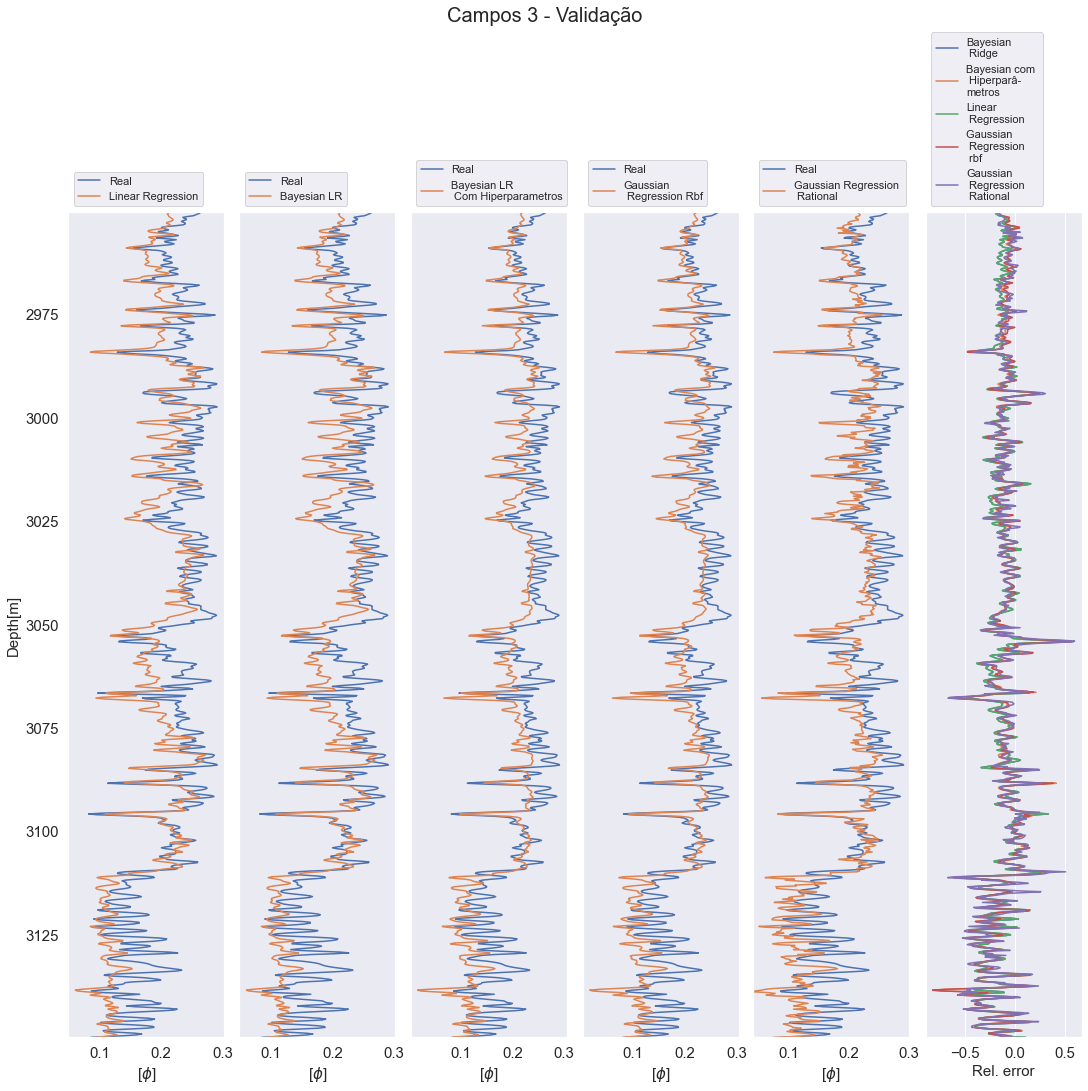

In [ ]:
f = plt.figure(figsize=(15,15), constrained_layout=True)
#plt.subtitle("This Main Title is Nicely Formatted", fontsize=16)


ax1 = f.add_subplot(161)
ax1.plot(y3_campos, depth3, label='Real')
ax1.plot(y_pred_blind_lr[0:2071], depth3, label='Linear Regression')
plt.legend(bbox_to_anchor =(0.001, 1, 1,0.001),prop={'size':11})
#plt.legend(loc='best')
plt.ylim(min(depth3),max(depth3))
plt.tick_params(axis='x', labelsize=15)
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
#plt.title('Campos 3 - Validação', size=12)
plt.xlabel('[$\phi$]', size=15)
plt.tick_params(axis='y', labelsize=15)
plt.grid()

ax2 = f.add_subplot(162)
ax2.plot(y3_campos, depth3, label='Real')
ax2.plot(y_pred_blind_bayreg[0:2071], depth3, label='Bayesian LR')
plt.legend(bbox_to_anchor =(0.001, 1, 1,0.001),prop={'size':11})
plt.ylim(min(depth3),max(depth3))
plt.tick_params(axis='x', labelsize=15)
plt.gca().invert_yaxis()
#plt.ylabel('Depth[m]', size=15)
plt.yticks([])
#plt.title('Campos 3 - Validação', size=12)
plt.xlabel('[$\phi$]', size=15)
#plt.tick_params(axis='y', labelsize=15)
plt.grid()

ax3 = f.add_subplot(163)
ax3.plot(y3_campos, depth3, label='Real')
ax3.plot(y_pred_blind_bayreg_parameters[0:2071], depth3, label='Bayesian LR \n Com Hiperparametros')
plt.legend(bbox_to_anchor =(0.001, 1, 1,0.001),prop={'size':11})
plt.ylim(min(depth3),max(depth3))
plt.tick_params(axis='x', labelsize=15)
plt.gca().invert_yaxis()
#plt.ylabel('Depth[m]', size=15)
plt.yticks([])
#plt.title('Campos 3 - Validação', size=12)
plt.xlabel('[$\phi$]', size=15)
plt.tick_params(axis='y', labelsize=15)
plt.grid()

#ax3 = f.add_subplot(163)
#ax3.plot(y3_campos, depth3, label='Real')
#ax3.plot(y_pred_blind_gpr[0:2071], depth3, label='Gaussian Regression')
#plt.legend(bbox_to_anchor =(0.001, 1, 1,0.001),prop={'size':11})
#plt.xlim(-.2,.5)
#plt.ylim(min(depth3),max(depth3))
#plt.tick_params(axis='x', labelsize=15)
#plt.gca().invert_yaxis()
#plt.ylabel('Depth[m]', size=15)
#plt.yticks([])
#plt.title('Campos-Validação 3-Blind', size=12)
#plt.xlabel('[$\phi$]', size=15)
#plt.tick_params(axis='y', labelsize=15)
#plt.grid()

ax4 = f.add_subplot(164)
ax4.plot(y3_campos, depth3, label='Real')
ax4.plot(y_pred_blind_gpr_kernelRbf[0:2071], depth3, label='Gaussian\n Regression Rbf')
plt.legend(bbox_to_anchor =(0.001, 1, 1,0.001),prop={'size':11})
#plt.xlim(-.2,.3)
plt.ylim(min(depth3),max(depth3))
plt.tick_params(axis='x', labelsize=15)
plt.gca().invert_yaxis()
#plt.ylabel('Depth[m]', size=15)
plt.yticks([])
#plt.title('Campos 3 - Validação', size=12)
plt.xlabel('[$\phi$]', size=15)
plt.grid()
plt.tick_params(axis='y', labelsize=15)


ax5 = f.add_subplot(165)
ax5.plot(y3_campos, depth3, label='Real')
plt.grid()
ax5.plot(y_pred_blind_gpr_kernelRational[0:2071], depth3, label='Gaussian Regression \n Rational')
plt.legend(bbox_to_anchor =(0.001, 1, 1,0.001),prop={'size':11})
plt.xlim(min(y_pred_blind_gpr_kernelRational[0:2071]),.3)
plt.ylim(min(depth3),max(depth3))
plt.tick_params(axis='x', labelsize=15)
plt.gca().invert_yaxis()
#plt.title('Student marks in different subjects ',loc ='center' ,fontsize=30)
#plt.ylabel([])
plt.yticks([])
#plt.title('Campos 3 - Validação', size=12)
plt.xlabel('[$\phi$]', size=15)
plt.tick_params(axis='y', labelsize=15)


ax6 = f.add_subplot(166)
ax6.plot(er_bayreg, depth3, label='Bayesian\n Ridge')
ax6.plot(er_bayreg_parameters[0:2071], depth3, label='Bayesian com \n Hiperparâ-\nmetros')
ax6.plot(er_lr, depth3, label='Linear\n Regression')
#ax7.plot(er_gpr[0:2071], depth3, label='Gaussian\n Regression' )
ax6.plot(er_gpr_kernelRbf[0:2071], depth3, label='Gaussian \n Regression\n rbf' )
ax6.plot(er_gpr_kernelRational[0:2071], depth3, label='Gaussian\n Regression \n Rational' )
plt.legend(bbox_to_anchor =(0.001, 1, 1,0.001),prop={'size':11})
#plt.legend(loc='best')
#plt.xlim(min(y_pred_blind_gpr_kernelRational[0:2071]),max(y_pred_blind_gpr_kernelRational[0:2071]))
plt.ylim(min(depth3),max(depth3))
plt.tick_params(axis='x', labelsize=15)
plt.gca().invert_yaxis()
#plt.ylabel('Depth[m]', size=15)
plt.yticks([])
#plt.title('Norne-Well 5-Blind', size=10)
plt.xlabel('Rel. error', size=15)
#plt.tick_params(axis='y', labelsize=15)

plt.suptitle('Campos 3 - Validação', size=20)
#plt.tight_layout(pad=0.2, w_pad=0.7, h_pad=1.0)
plt.savefig('C:/Users/CometLake_05/Documents/IsaacNilberto/graficos/graficosajuste2.eps',dp1=600,format='eps')
plt.savefig('C:/Users/CometLake_05/Documents/IsaacNilberto/graficos/graficosajuste2.png',dp1=600,format='png')
plt.show()

C:\Users\COMETL~1\AppData\Local\Temp/ipykernel_16956/489701507.py:116: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "dp1" which is no longer supported as of 3.3 and will become an error two minor releases later

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaqu

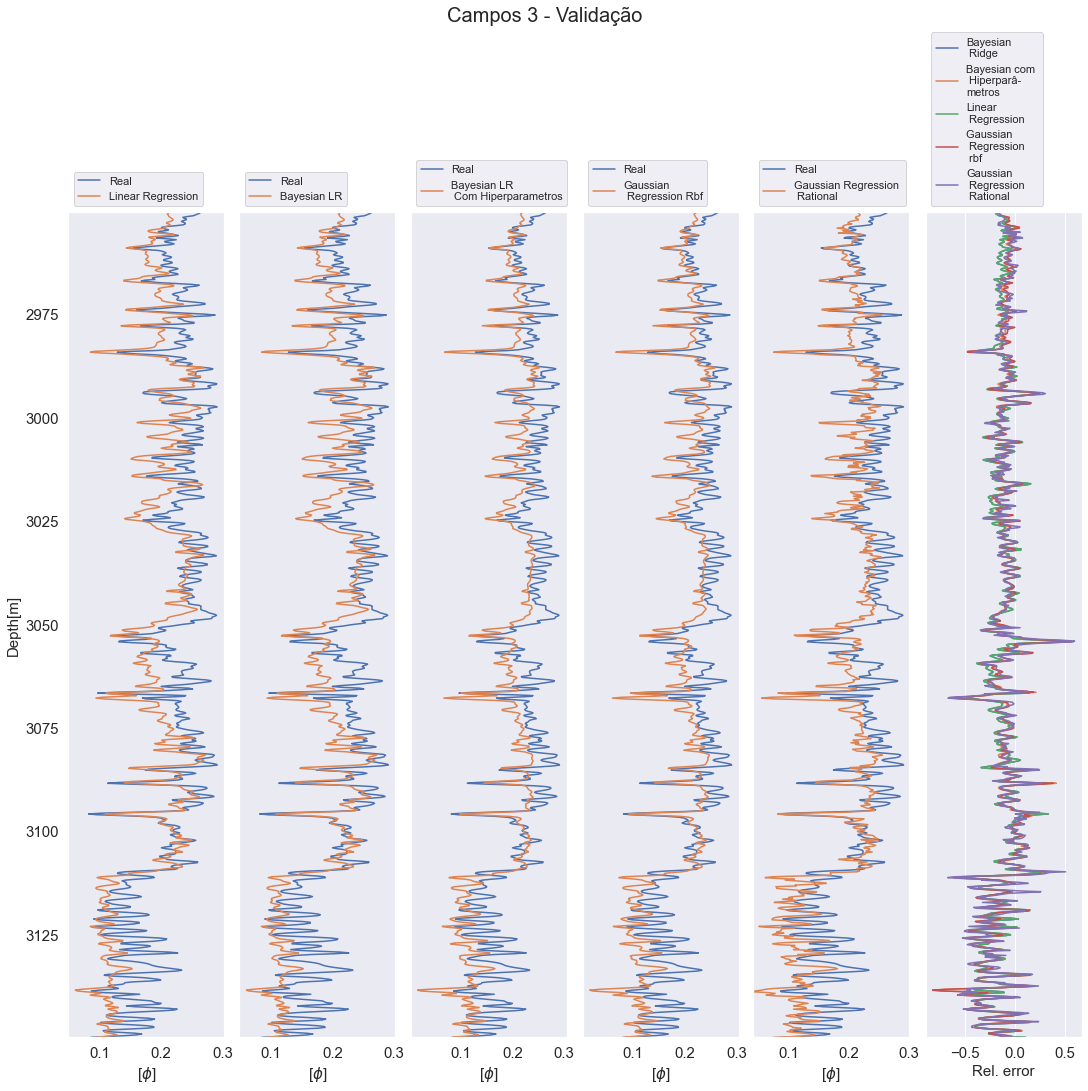

In [ ]:
f = plt.figure(figsize=(15,15), constrained_layout=True)
#plt.subtitle("This Main Title is Nicely Formatted", fontsize=16)


ax1 = f.add_subplot(161)
ax1.plot(y3_campos, depth3, label='Real')
ax1.plot(y_pred_blind_lr[0:2071], depth3, label='Linear Regression')
plt.legend(bbox_to_anchor =(0.001, 1, 1,0.001),prop={'size':11})
#plt.legend(loc='best')
plt.ylim(min(depth3),max(depth3))
plt.tick_params(axis='x', labelsize=15)
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
#plt.title('Campos 3 - Validação', size=12)
plt.xlabel('[$\phi$]', size=15)
plt.tick_params(axis='y', labelsize=15)
plt.grid()

ax2 = f.add_subplot(162)
ax2.plot(y3_campos, depth3, label='Real')
ax2.plot(y_pred_blind_bayreg[0:2071], depth3, label='Bayesian LR')
plt.legend(bbox_to_anchor =(0.001, 1, 1,0.001),prop={'size':11})
plt.ylim(min(depth3),max(depth3))
plt.tick_params(axis='x', labelsize=15)
plt.gca().invert_yaxis()
#plt.ylabel('Depth[m]', size=15)
plt.yticks([])
#plt.title('Campos 3 - Validação', size=12)
plt.xlabel('[$\phi$]', size=15)
#plt.tick_params(axis='y', labelsize=15)
plt.grid()

ax3 = f.add_subplot(163)
ax3.plot(y3_campos, depth3, label='Real')
ax3.plot(y_pred_blind_bayreg_parameters[0:2071], depth3, label='Bayesian LR \n Com Hiperparametros')
plt.legend(bbox_to_anchor =(0.001, 1, 1,0.001),prop={'size':11})
plt.ylim(min(depth3),max(depth3))
plt.tick_params(axis='x', labelsize=15)
plt.gca().invert_yaxis()
#plt.ylabel('Depth[m]', size=15)
plt.yticks([])
#plt.title('Campos 3 - Validação', size=12)
plt.xlabel('[$\phi$]', size=15)
plt.tick_params(axis='y', labelsize=15)
plt.grid()

#ax3 = f.add_subplot(163)
#ax3.plot(y3_campos, depth3, label='Real')
#ax3.plot(y_pred_blind_gpr[0:2071], depth3, label='Gaussian Regression')
#plt.legend(bbox_to_anchor =(0.001, 1, 1,0.001),prop={'size':11})
#plt.xlim(-.2,.5)
#plt.ylim(min(depth3),max(depth3))
#plt.tick_params(axis='x', labelsize=15)
#plt.gca().invert_yaxis()
#plt.ylabel('Depth[m]', size=15)
#plt.yticks([])
#plt.title('Campos-Validação 3-Blind', size=12)
#plt.xlabel('[$\phi$]', size=15)
#plt.tick_params(axis='y', labelsize=15)
#plt.grid()

ax4 = f.add_subplot(164)
ax4.plot(y3_campos, depth3, label='Real')
ax4.plot(y_pred_blind_gpr_kernelRbf[0:2071], depth3, label='Gaussian\n Regression Rbf')
plt.legend(bbox_to_anchor =(0.001, 1, 1,0.001),prop={'size':11})
#plt.xlim(-.2,.3)
plt.ylim(min(depth3),max(depth3))
plt.tick_params(axis='x', labelsize=15)
plt.gca().invert_yaxis()
#plt.ylabel('Depth[m]', size=15)
plt.yticks([])
#plt.title('Campos 3 - Validação', size=12)
plt.xlabel('[$\phi$]', size=15)
plt.grid()
plt.tick_params(axis='y', labelsize=15)


ax5 = f.add_subplot(165)
ax5.plot(y3_campos, depth3, label='Real')
plt.grid()
ax5.plot(y_pred_blind_gpr_kernelRational[0:2071], depth3, label='Gaussian Regression \n Rational')
plt.legend(bbox_to_anchor =(0.001, 1, 1,0.001),prop={'size':11})
plt.xlim(min(y_pred_blind_gpr_kernelRational[0:2071]),.3)
plt.ylim(min(depth3),max(depth3))
plt.tick_params(axis='x', labelsize=15)
plt.gca().invert_yaxis()
#plt.title('Student marks in different subjects ',loc ='center' ,fontsize=30)
#plt.ylabel([])
plt.yticks([])
#plt.title('Campos 3 - Validação', size=12)
plt.xlabel('[$\phi$]', size=15)
plt.tick_params(axis='y', labelsize=15)


ax6 = f.add_subplot(166)
ax6.plot(er_bayreg, depth3, label='Bayesian\n Ridge')
ax6.plot(er_bayreg_parameters[0:2071], depth3, label='Bayesian com \n Hiperparâ-\nmetros')
ax6.plot(er_lr, depth3, label='Linear\n Regression')
#ax7.plot(er_gpr[0:2071], depth3, label='Gaussian\n Regression' )
ax6.plot(er_gpr_kernelRbf[0:2071], depth3, label='Gaussian \n Regression\n rbf' )
ax6.plot(er_gpr_kernelRational[0:2071], depth3, label='Gaussian\n Regression \n Rational' )
plt.legend(bbox_to_anchor =(0.001, 1, 1,0.001),prop={'size':11})
#plt.legend(loc='best')
#plt.xlim(min(y_pred_blind_gpr_kernelRational[0:2071]),max(y_pred_blind_gpr_kernelRational[0:2071]))
plt.ylim(min(depth3),max(depth3))
plt.tick_params(axis='x', labelsize=15)
plt.gca().invert_yaxis()
#plt.ylabel('Depth[m]', size=15)
plt.yticks([])
#plt.title('Norne-Well 5-Blind', size=10)
plt.xlabel('Rel. error', size=15)
#plt.tick_params(axis='y', labelsize=15)

plt.suptitle('Campos 3 - Validação', size=20)
#plt.tight_layout(pad=0.2, w_pad=0.7, h_pad=1.0)
plt.savefig('C:/Users/CometLake_05/Documents/IsaacNilberto/graficos/graficosajuste2.eps',dp1=600,format='eps')
plt.savefig('C:/Users/CometLake_05/Documents/IsaacNilberto/graficos/graficosajuste2.png',dp1=600,format='png')
plt.show()